In [348]:
import numpy as np
import pandas as pd
#设置 pandas 在显示数据时，不限制显示的列数，即显示所有列。
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#设置 matplotlib 的绘图风格为 ggplot，这是一种类似于 R 语言中 ggplot2 包的绘图风格。
plt.style.use('ggplot')
import datetime
#LightGBM 是一个快速、高效的梯度提升框架
import lightgbm as lgb
#stats 模块，用于进行统计分析
from scipy import stats
#hstack 用于水平堆叠稀疏矩阵，csr_matrix 是一种压缩稀疏行矩阵格式
from scipy.sparse import hstack, csr_matrix
#train_test_split 用于将数据集划分为训练集和测试集，KFold 用于进行 K 折交叉验证。
from sklearn.model_selection import train_test_split, KFold
#生成词云图
from wordcloud import WordCloud
#用于统计元素的出现次数。
from collections import Counter
#获取停用词列表。
from nltk.corpus import stopwords
#用于生成 n-gram 序列。
from nltk.util import ngrams
#fidfVectorizer 用于将文本数据转换为 TF-IDF 特征矩阵，CountVectorizer 用于将文本数据转换为词频矩阵。
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
#一个用于自然语言处理的工具包
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
#用于与操作系统进行交互，例如文件和目录操作
import os
#plotly 是一个交互式可视化库，支持多种图表类型。
import plotly.offline as py
#允许在 Notebook 中直接显示交互式图表。
py.init_notebook_mode(connected=True)
#于创建各种图表对象。
import plotly.graph_objs as go
import plotly.tools as tls
#XGBoost 是另一个流行的梯度提升框架，常用于机器学习中的分类和回归任务。
import xgboost as xgb
#可能是代码编写时的重复操作
import lightgbm as lgb
#用于模型选择和评估。
from sklearn import model_selection
#用于计算分类模型的准确率。
from sklearn.metrics import accuracy_score
import json
#用于将字符串形式的 Python 表达式解析为抽象语法树
import ast
#用于对机器学习模型进行特征重要性分析和模型解释。
import eli5
#用于计算 SHAP 值，对模型的预测结果进行解释
import shap
#CatBoost 是一个基于梯度提升的机器学习库，对类别特征有很好的支持。
from catboost import CatBoostRegressor
#从 urllib.request 模块中导入 urlopen 函数，用于打开 URL 并读取数据。
from urllib.request import urlopen
#从 Pillow 库中导入 Image 类，用于图像处理
from PIL import Image
#用于对类别特征进行编码
from sklearn.preprocessing import LabelEncoder
import time
#用于计算回归模型的均方误差
from sklearn.metrics import mean_squared_error
#linear_model 模块中导入 LinearRegression 类，用于进行线性回归分析。
from sklearn.linear_model import LinearRegression
#可能是为了后续使用该模块中的其他线性模型。
from sklearn import linear_model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [349]:
train = pd.read_csv('../MoviesData/rawPredictData/train.csv')
test = pd.read_csv('../MoviesData/rawPredictData/test.csv')

# from this kernel: https://www.kaggle.com/gravix/gradient-in-a-box
#包含多个列名的列表
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
#该函数接受一个 DataFrame 对象 df 作为输入，将 dict_columns 列表中指定的列的数据从字符串转换为 Python 字典对象。
def text_to_dict(df):
    for column in dict_columns:
        #用于检查元素 x 是否为缺失值（NaN 或 None）。如果是缺失值，则返回一个空字典 {}。
        #ast.literal_eval(x) 函数将字符串 x 转换为 Python 字典对象。
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

In [350]:
train.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                 {}   3300000   
3   4                                                 {}   1200000   
4   5                                                 {}         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg   

                                production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
3                                                 {}   
4                                                 {}   

                                production_countries release_date  runtime  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15     93.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04    113.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14    105.0   
3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12    122.0   
4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09    118.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name':

In [351]:
train.shape, test.shape

((3000, 23), (4398, 22))

In [352]:
#belongs_to_collection 属性用于表明一部电影是否属于某个系列电影集合。
for i, e in enumerate(train['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}
4 {}


In [353]:
train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

belongs_to_collection
0    2396
1     604
Name: count, dtype: int64

In [354]:
#改造belongs_to_collection这一列，将其拆分为collection_name和has_collection

train['collection_name'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

test['collection_name'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

train = train.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

In [355]:
for i, e in enumerate(train['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [356]:
print('Number of genres in films')
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of genres in films


genres
2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: count, dtype: int64

In [357]:
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

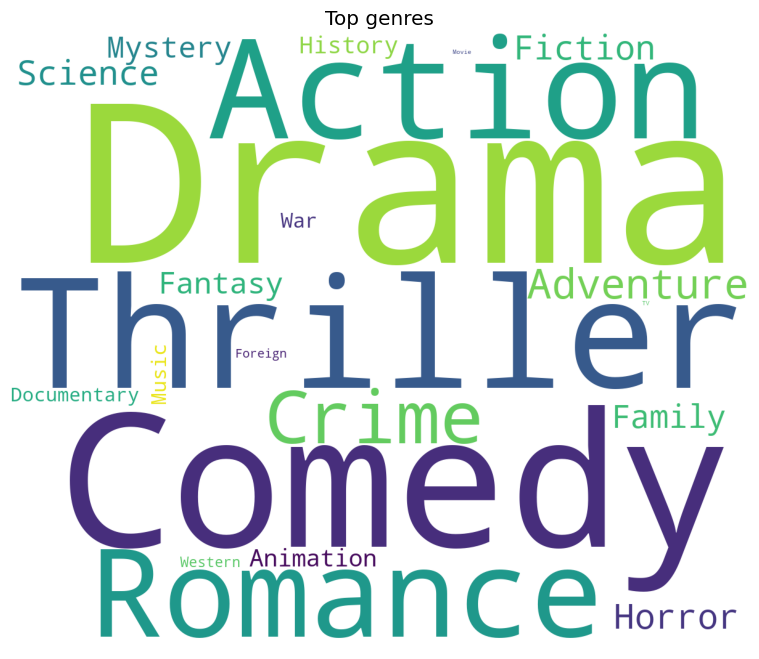

In [358]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
#WordCloud() 是 wordcloud 库中的一个类，用于创建词云对象。
#max_font_size=None 表示词云中字体的最大大小不做限制，由词云生成算法自动决定。
#background_color='white' 指定词云的背景颜色为白色。
#ollocations=False 表示不考虑词的搭配，即每个词独立处理。
#width=1200 和 height=1000 分别指定词云图像的宽度和高度（单位为像素）。
#generate(text) 是 WordCloud 对象的一个方法，用于根据输入的字符串 text 生成词云。
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
#"off" 表示关闭坐标轴的显示
plt.axis("off")
plt.show()

In [359]:
#Counter统计可迭代对象中每个元素的出现次数
#它会返回一个 Counter 对象，这个对象本质上是一个字典，键是可迭代对象中的元素，值是该元素的出现次数
#most_common() 是 Counter 对象的一个方法，用于返回一个包含元素及其出现次数的元组列表，并且按照出现次数从多到少进行排序。
Counter([i for j in list_of_genres for i in j]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [360]:
#将genres这一列分为num_genres（题材数量）和all_genres（每部电影的题材列表）
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
#将前15个出现次数最多的题材放到top_genres这个列表里
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]

#创建15个新属性，每一列都是0或1，即代表该电影是否属于该题材
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)

test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)

#消除genres这个属性
train = train.drop(['genres'], axis=1)
test = test.drop(['genres'], axis=1)

In [361]:
#制作公司属性
for i, e in enumerate(train['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


In [362]:
print('Number of production companies in films')
train['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production companies in films


production_companies
1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
10      7
11      7
12      3
15      2
16      2
13      1
14      1
17      1
Name: count, dtype: int64

In [363]:
#使用布尔类型的 Series 对象作为索引来筛选 train 数据集。
#只有当布尔 Series 中的元素为 True 时，对应的 train 数据集中的行才会被保留；为 False 的行则会被过滤掉。
train[train['production_companies'].apply(lambda x: len(x) if x != {} else 0) > 11]

id    budget                                           homepage  \
31      32         0                        http://www.cache-derfilm.at   
116    117         0                                                NaN   
363    364  15400000                                                NaN   
392    393         0                                                NaN   
449    450  80000000             http://asoundofthunder.warnerbros.com/   
554    555  14500000                                                NaN   
1079  1080   7000000                                                NaN   
2170  2171   4000000  http://tickets.picturehouseentertainment.co.uk...   
2395  2396         0                                                NaN   
2517  2518  97250400  http://www.asterixauxjeuxolympiques.com/index.php   

        imdb_id original_language               original_title  \
31    tt0387898                fr                        Caché   
116   tt2113822                zh                         一九四二   
363   tt2053425                fr           De rouille et d'os   
392   tt5072406                fr                         Moka   
449   tt0318081                en           A Sound of Thunder   
554   tt0293416                ja                   Metropolis   
1079  tt2737050                fr         Deux jours, une nuit   
2170  tt3464902                en                  The Lobster   
2395  tt4082068                fr                      Dheepan   
2517  tt0463872                fr  Astérix aux Jeux Olympiques   

                                               overview  popularity  \
31    A married couple is terrorized by a series of ...    5.695860   
116   In 1942, Henan Province was devastated by the ...    1.678013   
363   Put in charge of his young son, Ali leaves Bel...    8.400049   
392   Diane Kramer is led by one obsession: to find ...    2.404466   
449   When a hunter sent back to the prehistoric era...    4.980191   
554   Duke Red has overseen the construction of a ma...    9.298092   
1079  Sandra is a young woman who has only one weeke...    6.868022   
2170  In a dystopian near future, single people, acc...   11.223033   
2395  Dheepan is a Sri Lankan Tamil warrior who flee...    5.752416   
2517  Ast√©rix and Ob√©lix have to win the Olympic G...    9.671944   

                           poster_path  \
31    /i1Zl8S4DgM3IDLW5dhZzBnIdCOe.jpg   
116    /xxz2gi8vijqqJySGO3kQy2i8mv.jpg   
363   /cHCwW8xPl8yPKQwpNzKVinwvirT.jpg   
392   /5VKVaTJJsyDeOzY6fLcyTo1RA9g.jpg   
449   /gsqOX1ReJ5lcmTuDdkhOXLug8Ug.jpg   
554   /1EK7mGCpRKYmSg25FaojvnS9opm.jpg   
1079  /1mYAejpMskvskGr0J0SaBvdjmrH.jpg   
2170  /yR60EqMGS9hHq9I5Pkq2hG984TP.jpg   
2395  /lgONuekbRlM0eMvMHJBEDL6MsBP.jpg   
2517  /tKL0RJOeuccc1rrpcDKg8qhedIz.jpg   

                                   production_companies  \
31    [{'name': 'Les Films du Losange', 'id': 223}, ...   
116   [{'name': 'Emperor Motion Pictures', 'id': 272...   
363   [{'name': 'France 2 Cinéma', 'id': 83}, {'name...   
392   [{'name': 'Canal+', 'id': 5358}, {'name': 'Cin...   
449   [{'name': 'Epsilon Motion Pictures', 'id': 117...   
554   [{'name': 'Bandai Visual Company', 'id': 528},...   
1079  [{'name': 'BIM Distribuzione', 'id': 225}, {'n...   
2170  [{'name': 'Haut et Court', 'id': 726}, {'name'...   
2395  [{'name': 'France 2 Cinéma', 'id': 83}, {'name...   
2517  [{'name': 'Constantin Film', 'id': 47}, {'name...   

                                   production_countries release_date  runtime  \
31    [{'iso_3166_1': 'AT', 'name': 'Austria'}, {'is...       5/2/05    117.0   
116             [{'iso_3166_1': 'CN', 'name': 'China'}]      11/1/12    145.0   
363   [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...      5/17/12    123.0   
392   [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...      8/17/16     89.0   
449   [{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...      5/15/05    110.0   
554             [{'iso_3166_1': 'JP', 'name': 'Japan'}]      5/26/01    10

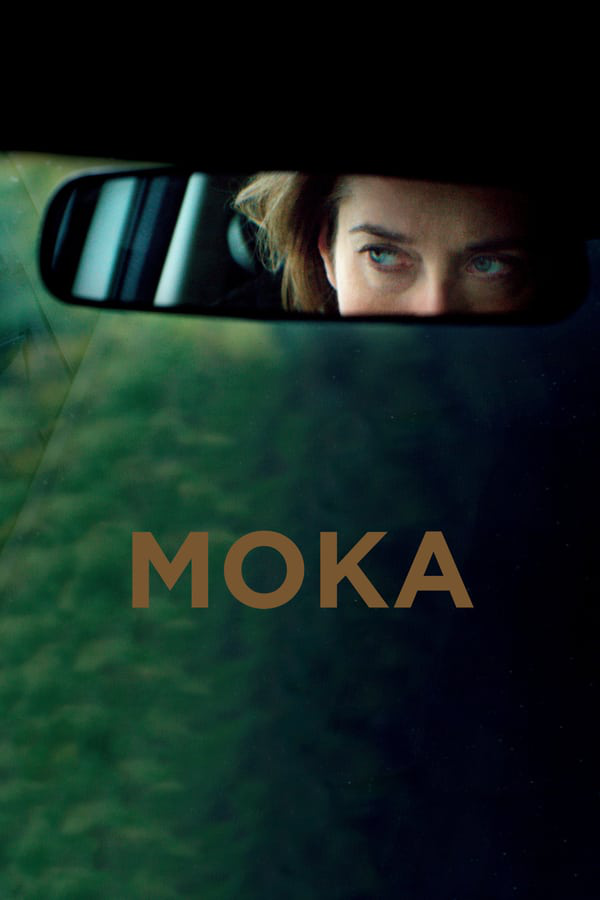

In [364]:
img = Image.open(urlopen("https://image.tmdb.org/t/p/w600_and_h900_bestv2/5VKVaTJJsyDeOzY6fLcyTo1RA9g.jpg"))
img

In [365]:
#两层列表
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [366]:
Counter([i for j in list_of_companies for i in j]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

In [367]:
#将production_companies分为num_companies（每部电影的赞助公司有几个）和all_production_companies
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
#将出现次数最多的赞助公司名放入top_companies列表
#list_of_companies  [[],[],[]]
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
#设置新的属性，每一列都是0或1，即代表该电影是否受该公司的赞助
for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test['production_company_' + g] = test['all_production_companies'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_companies', 'all_production_companies'], axis=1)
test = test.drop(['production_companies', 'all_production_companies'], axis=1)

In [368]:
for i, e in enumerate(train['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [369]:
#出品的国家属性
print('Number of production countries in films')
train['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production countries in films


production_countries
1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: count, dtype: int64

In [370]:
#list_of_countries  [[],[],[]]
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_countries for i in j]).most_common(25)

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10)]

In [371]:
#将production_countries分成num_countries和all_countries两个属性
train['num_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
train['all_countries'] = train['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train['production_country_' + g] = train['all_countries'].apply(lambda x: 1 if g in x else 0)
    
test['num_countries'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test['all_countries'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test['production_country_' + g] = test['all_countries'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_countries', 'all_countries'], axis=1)
test = test.drop(['production_countries', 'all_countries'], axis=1)

In [372]:
for i, e in enumerate(train['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [373]:
#
print('Number of spoken languages in films')
train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of spoken languages in films


spoken_languages
1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: count, dtype: int64

In [374]:
#[[],[]]
list_of_languages = list(train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_languages for i in j]).most_common(15)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27)]

In [375]:
#将spoken_languages属性分为num_languages（语言数量）和all_languages
train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
train['all_languages'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train['language_' + g] = train['all_languages'].apply(lambda x: 1 if g in x else 0)
    
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test['all_languages'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_languages:
    test['language_' + g] = test['all_languages'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['spoken_languages', 'all_languages'], axis=1)
test = test.drop(['spoken_languages', 'all_languages'], axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1127505664.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1127505664.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1127505664.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [376]:
for i, e in enumerate(train['Keywords'][:5]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [377]:
print('Number of Keywords in films')
train['Keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of Keywords in films


Keywords
5    293
0    276
4    248
3    228
6    227
2    207
7    192
1    187
8    161
9    134
Name: count, dtype: int64

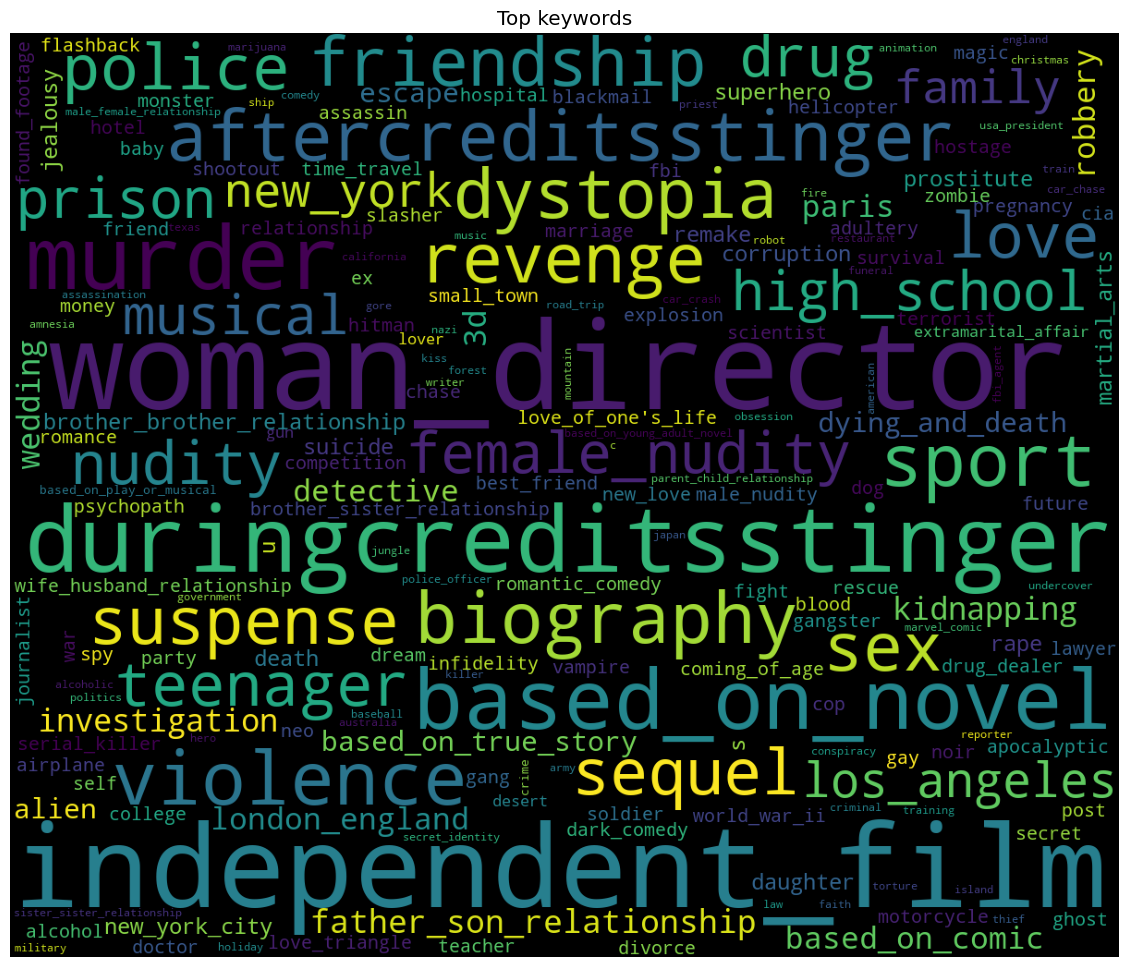

In [378]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (16, 12))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top keywords')
plt.axis("off")
plt.show()

In [379]:
#将Keywords分成num_Keywords（ 每部电影关键词个数）和all_Keywords
train['num_Keywords'] = train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
train['all_Keywords'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
#出现次数最多的关键词组成一个列表
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
#将这些热度高的关键词各自组成一个属性（0、1）
for g in top_keywords:
    train['keyword_' + g] = train['all_Keywords'].apply(lambda x: 1 if g in x else 0)
    
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test['all_Keywords'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_keywords:
    test['keyword_' + g] = test['all_Keywords'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['Keywords', 'all_Keywords'], axis=1)
test = test.drop(['Keywords', 'all_Keywords'], axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1249976483.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1249976483.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1249976483.py:8: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [380]:
for i, e in enumerate(train['cast'][:1]):
    print(i, e)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

In [381]:
#出演的演员属性
print('Number of casted persons in films')
train['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


cast
15    212
16    165
10    135
13    129
12    124
11    122
17    118
9     118
18    115
14    110
Name: count, dtype: int64

In [382]:
#选出最常见的演员
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_names for i in j]).most_common(15)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

In [383]:
#性别
list_of_cast_genders = list(train['cast'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_genders for i in j]).most_common()

[(2, 27949), (0, 20329), (1, 13533)]

In [384]:
#角色
list_of_cast_characters = list(train['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_characters for i in j]).most_common(15)

[('', 818),
 ('Himself', 610),
 ('Herself', 155),
 ('Dancer', 144),
 ('Additional Voices (voice)', 100),
 ('Doctor', 77),
 ('Reporter', 70),
 ('Waitress', 69),
 ('Nurse', 65),
 ('Bartender', 55),
 ('Jack', 54),
 ('Debutante', 54),
 ('Security Guard', 50),
 ('Paul', 48),
 ('Frank', 44)]

In [385]:
#将cast属性转为num_cast属性(演员数量)
train['num_cast'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)
#出演次数最多的演员放在一个列表里
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
#将这些演员单独变成一个属性（0，1）
for g in top_cast_names:
    train['cast_name_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
#增加3列属性，代表不同的性别
train['genders_0_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
#统计出演率最高的角色
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
#将出演率最高的角色单独作为属性
for g in top_cast_characters:
    train['cast_character_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
test['num_cast'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)
for g in top_cast_names:
    test['cast_name_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for g in top_cast_characters:
    test['cast_character_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)

train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\171413634.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\171413634.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\171413634.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `

In [386]:
#电影制作团队信息的属性
for i, e in enumerate(train['crew'][:1]):
    print(i, e[:10])

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

In [387]:
#每部电影的制作团队（crew）人数分布情况
print('Number of casted persons in films')
train['crew'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


crew
2     179
11    127
10    126
3     126
12    110
8     109
9     109
14    104
4     101
7      94
Name: count, dtype: int64

In [388]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_names for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

In [389]:
#将每个电影制作团队的职务列表，放进一个集合
list_of_crew_jobs = list(train['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
#出现率最高的职务列表
Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)

[('Producer', 6011),
 ('Executive Producer', 3459),
 ('Director', 3225),
 ('Screenplay', 2996),
 ('Editor', 2824),
 ('Casting', 2483),
 ('Director of Photography', 2288),
 ('Original Music Composer', 1947),
 ('Art Direction', 1821),
 ('Production Design', 1650),
 ('Costume Design', 1573),
 ('Writer', 1523),
 ('Set Decoration', 1345),
 ('Makeup Artist', 1108),
 ('Sound Re-Recording Mixer', 970)]

In [390]:
#团队人员的性别取出，统计人数
list_of_crew_genders = list(train['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_genders for i in j]).most_common(15)

[(0, 41787), (2, 24898), (1, 6412)]

In [391]:
#制作团队部门统计次数
list_of_crew_departments = list(train['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_departments for i in j]).most_common(14)

[('Production', 15887),
 ('Sound', 9319),
 ('Art', 8069),
 ('Crew', 7315),
 ('Writing', 6567),
 ('Costume & Make-Up', 6156),
 ('Camera', 5424),
 ('Directing', 4954),
 ('Editing', 4508),
 ('Visual Effects', 3591),
 ('Lighting', 1303),
 ('Actors', 4)]

In [392]:
list_of_crew_names = train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values
Counter([i for j in list_of_crew_names for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

In [393]:
#每部电影制作团队的人数
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
#最火的制作团队人员名字
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(15)]
#将这些人单独设立一个属性
for g in top_crew_names:
    train['crew_name_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
#设立不同性别的制作团队人员数量属性
train['genders_0_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
#设立最主要的制作团队职务列表
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
#单独设立属性
for j in top_crew_jobs:
    train['jobs_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
#设立最主要的制作团队部分列表
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
#单独设立属性
for j in top_crew_departments:
    train['departments_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
for g in top_crew_names:
    test['crew_name_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for j in top_crew_jobs:
    test['jobs_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
for j in top_crew_departments:
    test['departments_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\574664816.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\574664816.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\574664816.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `

In [394]:
train.head()

id    budget                           homepage    imdb_id  \
0   1  14000000                                NaN  tt2637294   
1   2  40000000                                NaN  tt0368933   
2   3   3300000  http://sonyclassics.com/whiplash/  tt2582802   
3   4   1200000         http://kahaanithefilm.com/  tt1821480   
4   5         0                                NaN  tt1380152   

  original_language                            original_title  \
0                en                    Hot Tub Time Machine 2   
1                en  The Princess Diaries 2: Royal Engagement   
2                en                                  Whiplash   
3                hi                                   Kahaani   
4                ko                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path release_date  runtime    status  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg      2/20/15     93.0  Released   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg       8/6/04    113.0  Released   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg     10/10/14    105.0  Released   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg       3/9/12    122.0  Released   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg       2/5/09    118.0  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title   revenue  \
0                    Hot Tub Time Machine 2  12314651   
1  The Princess Diaries 2: Royal Engagement  95149435   
2                                  Whiplash  13092000   
3                                   Kahaani  16000000   
4                                Marine Boy   3923970   

                   collection_name  has_collection  num_genres  \
0  Hot Tub Time Machine Collection               1           1   
1  The Princess Diaries Collection               1           4   
2                                0               0           1   
3                                0               0           2   
4                                0               0           2   

                    all_genres  genre_Drama  genre_Comedy  genre_Thriller  \
0                       Comedy            0             1               0   
1  Comedy Drama Family Romance            1             1               0   
2                        Drama            1             0               0   
3               Drama Thriller            1             0               1   
4              Action Thriller            0             0               1   

   genre_Action  genre_Romance  genre_Crime  genre_Adventure  genre_Horror  \
0             0              0            0                0             0   
1             0              1            0                0             0   
2             0              0            0                0             0   
3             0              0            0                0             0   
4             1              0            0                0             0   

   genre_Science Fiction  genre_Family  genre_Fantasy  genre_Mystery  \
0                      0             0              0              0   
1                      0             1              0              0   
2                      0             0              0              0   
3                      0             0              0              0   
4               

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\3548741503.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



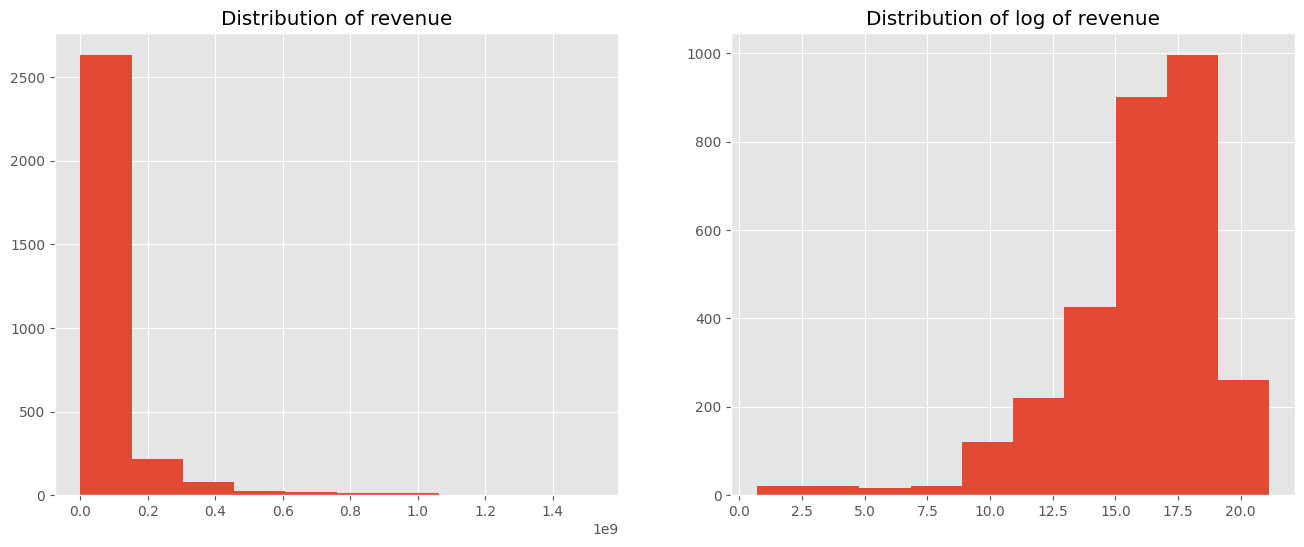

In [395]:
#横轴代表的是电影的票房收入（revenue）
#纵轴是频数
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']));
plt.title('Distribution of log of revenue');

In [396]:
#创建新的属性log_revenue
train['log_revenue'] = np.log1p(train['revenue'])

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\474614009.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



C:\Users\PC\AppData\Local\Temp\ipykernel_16464\2520101284.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



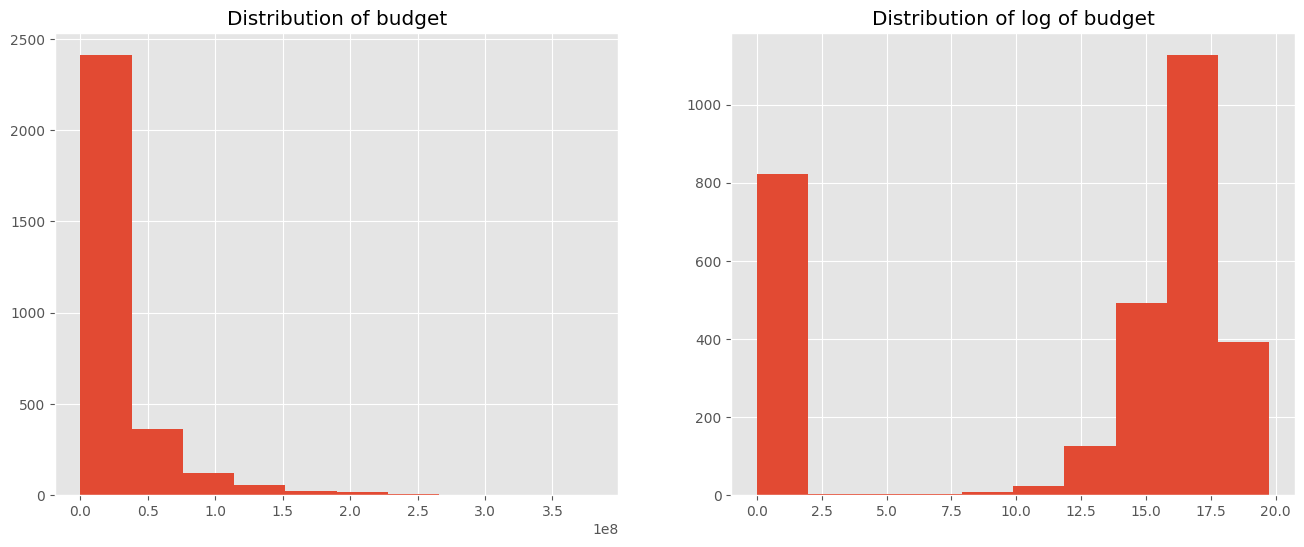

In [397]:
#横轴是预算
#纵轴是频数
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']));
plt.title('Distribution of log of budget');

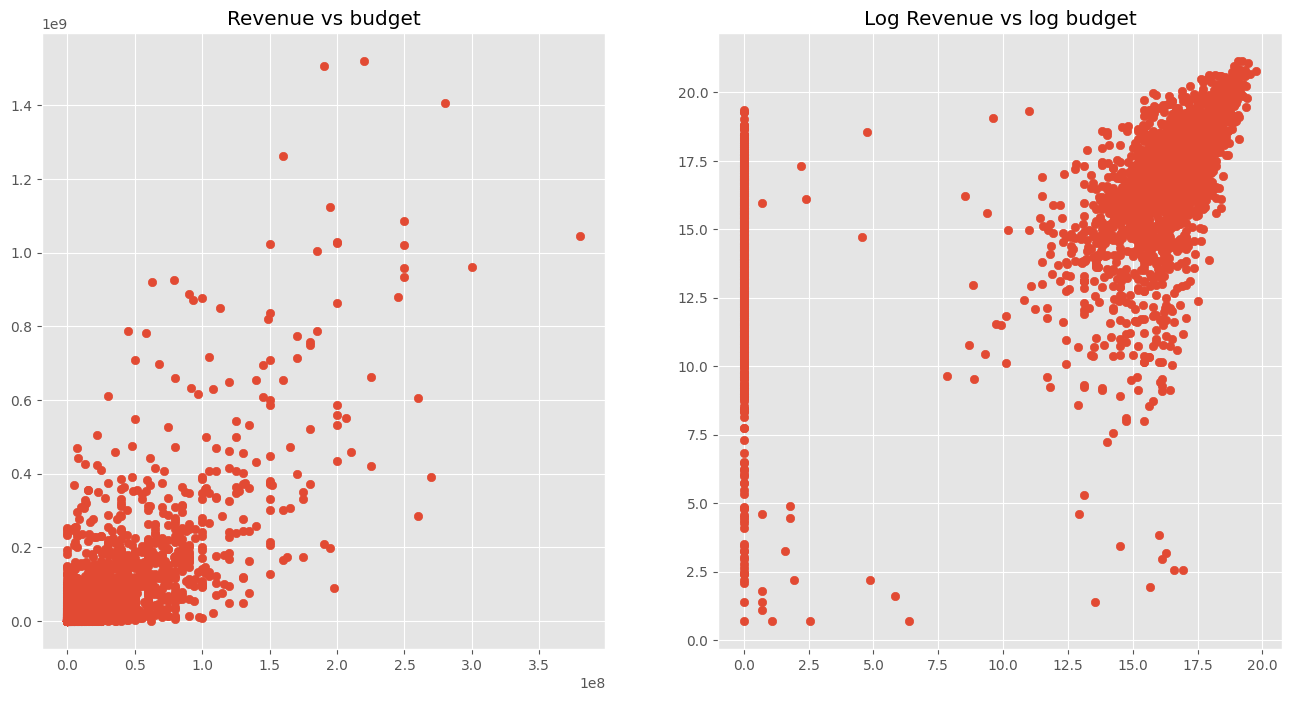

In [398]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
#此函数会将每部电影的预算作为横坐标，票房收入作为纵坐标
#在子图中绘制出一个个散点，从而直观地展示预算和票房收入之间的关系。
plt.scatter(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget']), train['log_revenue'])
plt.title('Log Revenue vs log budget');

In [399]:
#创建新属性
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1618847145.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1618847145.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [400]:
train.shape, test.shape

((3000, 235), (4398, 233))

In [401]:
print(train.shape,test.shape)

(3000, 235) (4398, 233)


In [402]:
#代表某部电影的官方网站链接
train['homepage'].value_counts().head()

homepage
http://www.transformersmovie.com/               4
http://www.thehobbit.com/                       2
http://www.lordoftherings.net/                  2
http://sonyclassics.com/whiplash/               1
https://www.facebook.com/thefinesthoursmovie    1
Name: count, dtype: int64

In [403]:
#添加拥有官方页面的属性
train['has_homepage'] = 0
#train['homepage'].isnull()这部分代码会对 train 数据集中 homepage 列的每个元素进行检查，判断其是否为缺失值（NaN）。
# 返回一个布尔类型的 Series，其中 True 表示对应位置的元素是缺失值，False 表示不是缺失值。
#使用 loc 方法根据上述布尔 Series 进行索引，选取 homepage 列不为缺失值的那些行，并指定 has_homepage 列。
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\3491549558.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\3491549558.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



f:\anaconda\envs\pytorch\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



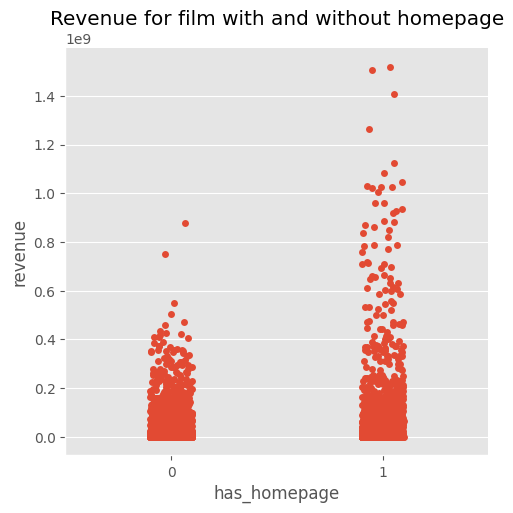

In [404]:
#sns.catplot：seaborn 库中的 catplot 函数用于绘制分类图
#has_homepage=0 表示电影没有主页，1 表示电影有主页。catplot 会根据这个变量的值将数据分为两组。
#指定数值变量，即我们要观察的目标变量，这里是电影的票房收入。
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for film with and without homepage');

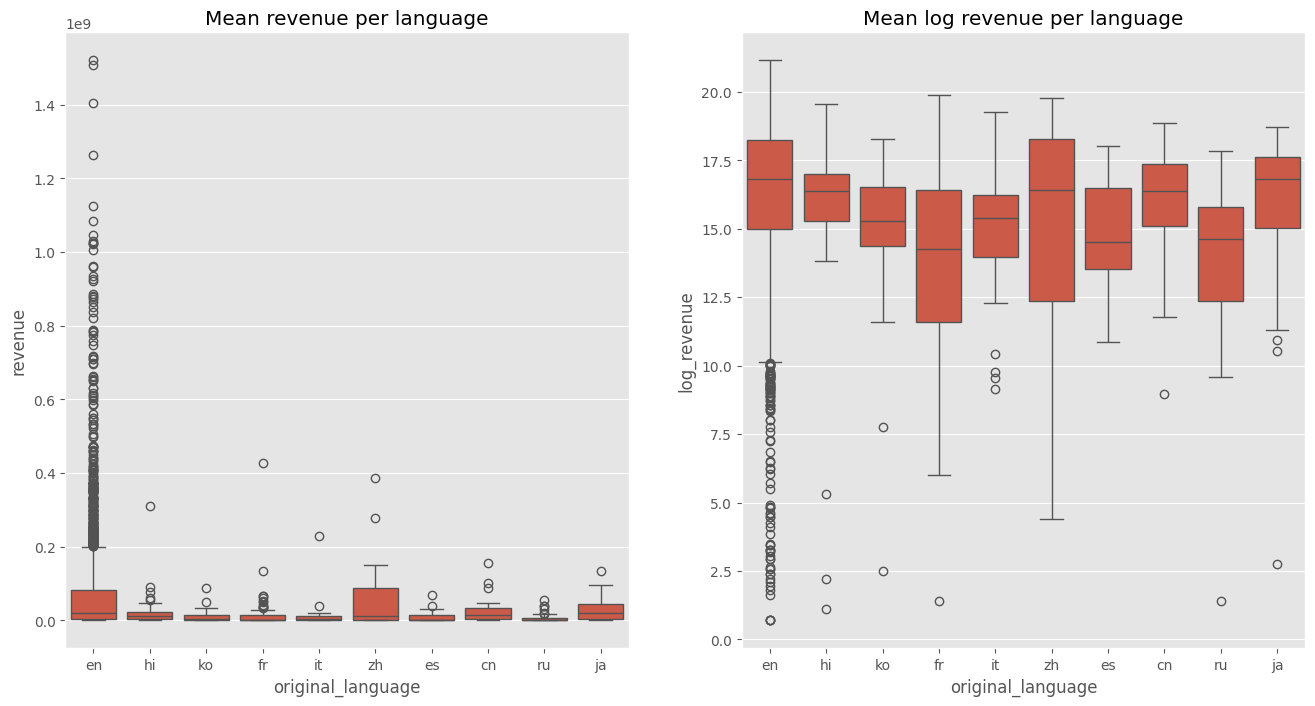

In [405]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
#sns.boxplot 是 seaborn 库中用于绘制箱线图的函数。
#x='original_language'：指定分类变量，即电影的原始语言。箱线图会按照不同的语言对数据进行分组。
#y='revenue'：指定数值变量，即电影的票房收入。
sns.boxplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

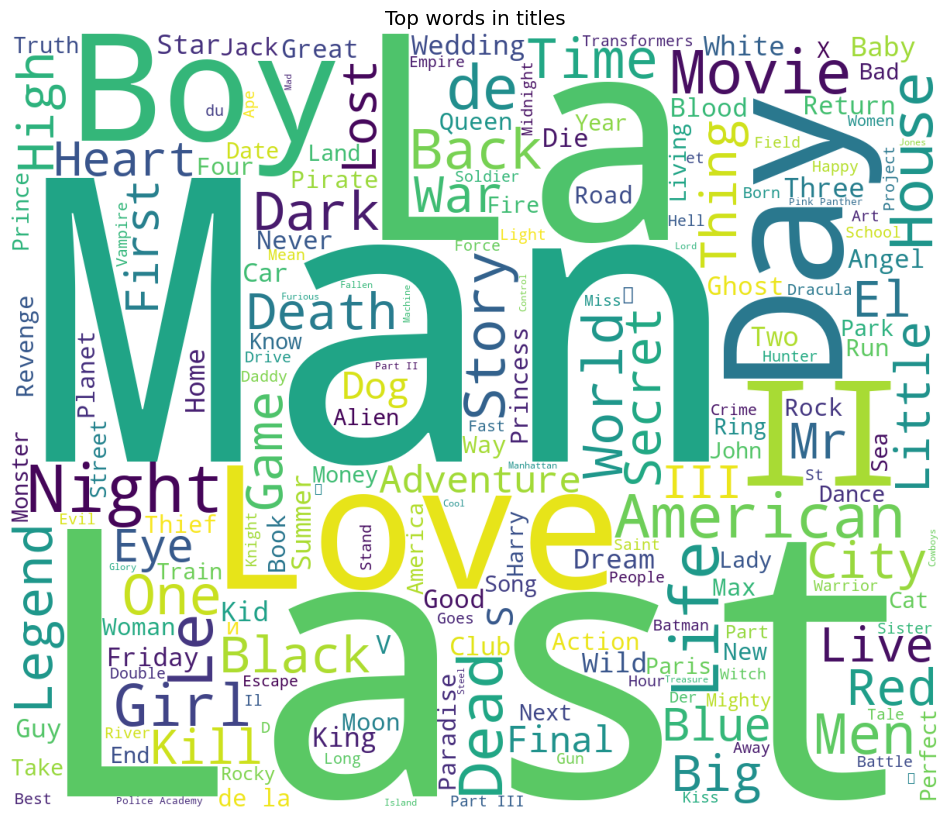

In [406]:
#统计电影名最常见的词
plt.figure(figsize = (12, 12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

In [407]:
train.shape, test.shape

((3000, 236), (4398, 234))

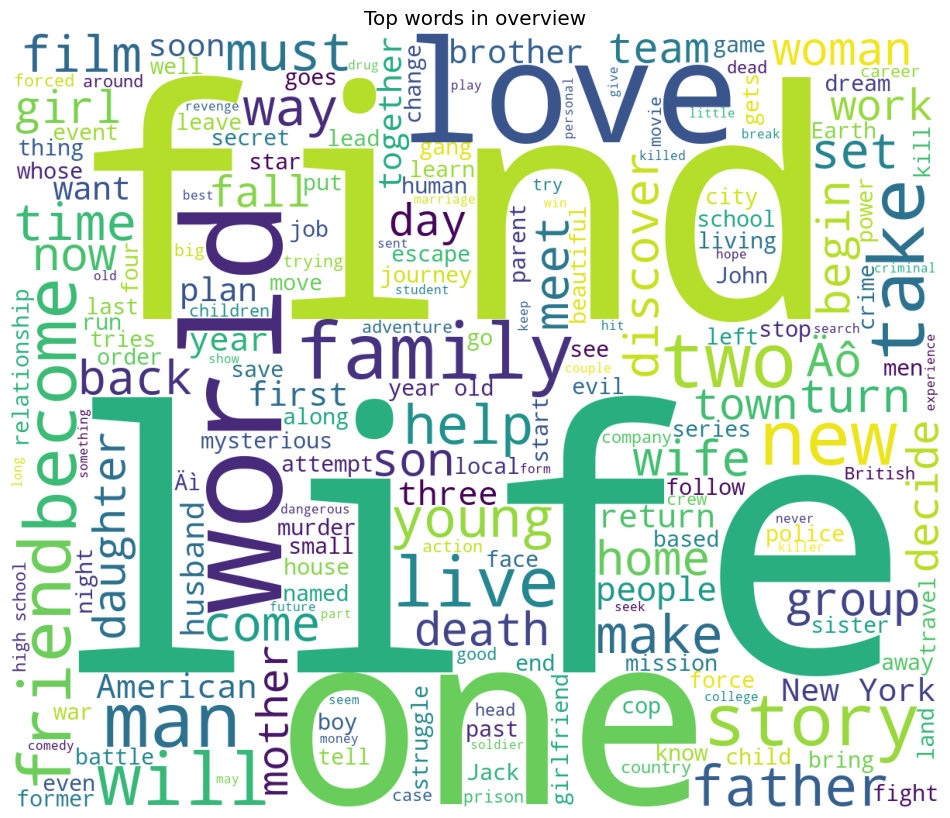

In [408]:
#简介中出现的词
plt.figure(figsize = (12, 12))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

In [409]:
#TfidfVectorizer用于将文本数据转换为数值特征矩阵。
vectorizer = TfidfVectorizer(
            #采用次线性 tf（词频）缩放，即使用 1 + log(tf) 而不是 tf 来计算词频，这样可以减轻高频词的影响。
            sublinear_tf=True,
            #指定分析器为基于单词进行分析，即把文本拆分成单词来处理。
            analyzer='word',
            #定义分词模式，\w 表示匹配任何字母、数字或下划线字符，{1,} 表示匹配前面的字符至少一次，所以该模式会将文本按单词进行分割。
            token_pattern=r'\w{1,}',
            #指定 n - gram 的范围，这里表示同时考虑单个单词（unigram）和相邻两个单词组成的词组（bigram）作为特征。
            ngram_range=(1, 2),
            #设置最小文档频率为 5，即只有在至少 5 个文档中出现过的单词或词组才会被作为特征，这样可以过滤掉一些低频、可能是噪声的词汇。
            min_df=5)
#数据转换为 TF - IDF 特征矩阵
overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
#LinearRegression()：创建一个线性回归模型对象。
linreg = LinearRegression()
#使用提取的文本特征矩阵 overview_text 作为输入特征，train['log_revenue'] 作为目标变量，对线性回归模型进行训练。
linreg.fit(overview_text, train['log_revenue'])
#使用 eli5 库的 show_weights 函数展示线性回归模型的特征权重。
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

In [410]:
print('Target value:', train['log_revenue'][1000])
#doc 参数指定要进行预测解释的文档，即使用这个电影简介文本作为输入，让模型进行预测并解释预测过程。
#将文本数据转换为数值特征矩阵
eli5.show_prediction(linreg, doc=train['overview'].values[1000], vec=vectorizer)

Target value: 16.44583954907521


Text(0.5, 1.0, 'Log Revenue vs popularity')

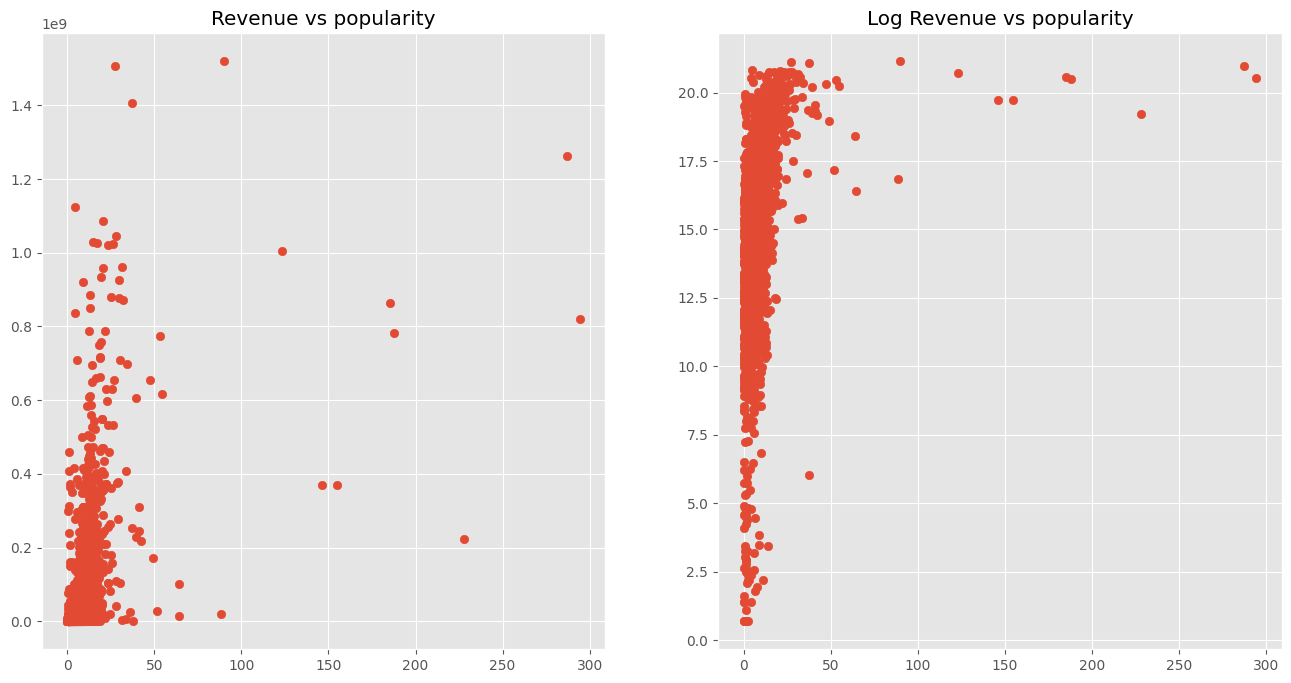

In [411]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['popularity'], train['revenue'])
plt.title('Revenue vs popularity')
plt.subplot(1, 2, 2)
plt.scatter(train['popularity'], train['log_revenue'])
plt.title('Log Revenue vs popularity')

In [412]:
#发布日期或上映日期属性
#将前面选取的那些 release_date 列中的缺失值统一替换为 '01/01/98' 这个日期字符串
test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'

In [413]:
#将年份进行丰富，比如18变成2018
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [414]:
#将数据集中年份进行丰富
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))
#to_datetime将输入数据转换为 datetime 类型的函数。
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [415]:
#循环提取日期信息并添加新列
def process_date(df):
    date_parts = ["year", "weekday", "month", 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    
    # 处理 weekofyear
    df['release_date_weekofyear'] = df['release_date'].dt.isocalendar().week.astype(int)
    
    return df


# 应用处理函数
train = process_date(train)
test = process_date(test)

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\3762020589.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\3762020589.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\3762020589.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [416]:
#.value_counts() 方法用于统计每个年份出现的次数，即每年电影的数量。
#.sort_index() 方法按照年份的升序对统计结果进行排序。
d1 = train['release_date_year'].value_counts().sort_index()
d2 = test['release_date_year'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]
#将每年电影数量展示出来
layout = go.Layout(dict(title = "Number of films per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [417]:
d1 = train['release_date_year'].value_counts().sort_index()
#对每组中的 revenue 列求和，得到每个年份电影的总票房收入。
d2 = train.groupby(['release_date_year'])['revenue'].sum()
data = [go.Scatter(x=d1.index, y=d1.values, name='film count'), go.Scatter(x=d2.index, y=d2.values, name='total revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Number of films and total revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Total revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [418]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].mean()
data = [go.Scatter(x=d1.index, y=d1.values, name='film count'), go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

f:\anaconda\envs\pytorch\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.0, 'Revenue on different days of week of release')

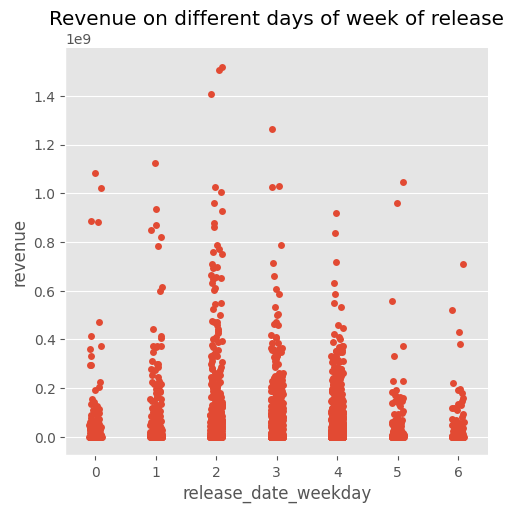

In [419]:
sns.catplot(x='release_date_weekday', y='revenue', data=train)
plt.title('Revenue on different days of week of release')

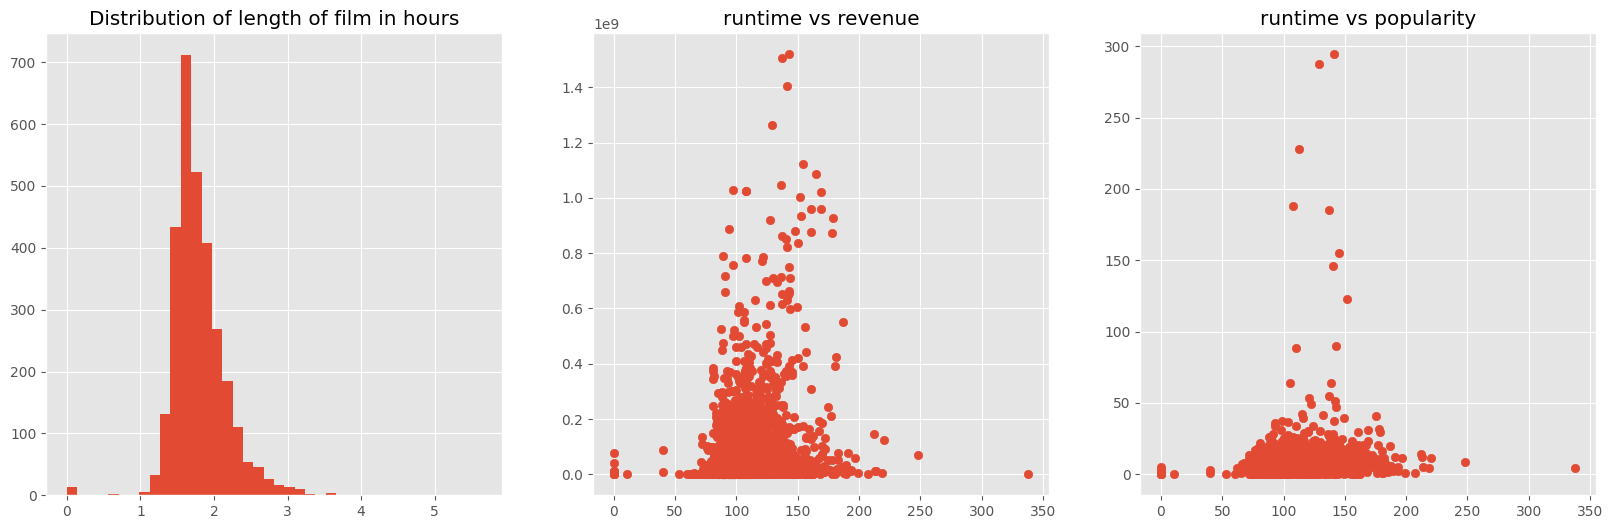

In [420]:
#runtime 指的是作品的时长
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(train['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(train['runtime'].fillna(0), train['revenue'])
plt.title('runtime vs revenue');
plt.subplot(1, 3, 3)
plt.scatter(train['runtime'].fillna(0), train['popularity'])
plt.title('runtime vs popularity');

In [421]:
#指电影的制作与发行状态
train['status'].value_counts()

status
Released    2996
Rumored        4
Name: count, dtype: int64

In [422]:
#Post Production 代表后期制作中
test['status'].value_counts()

status
Released           4389
Post Production       5
Rumored               2
Name: count, dtype: int64

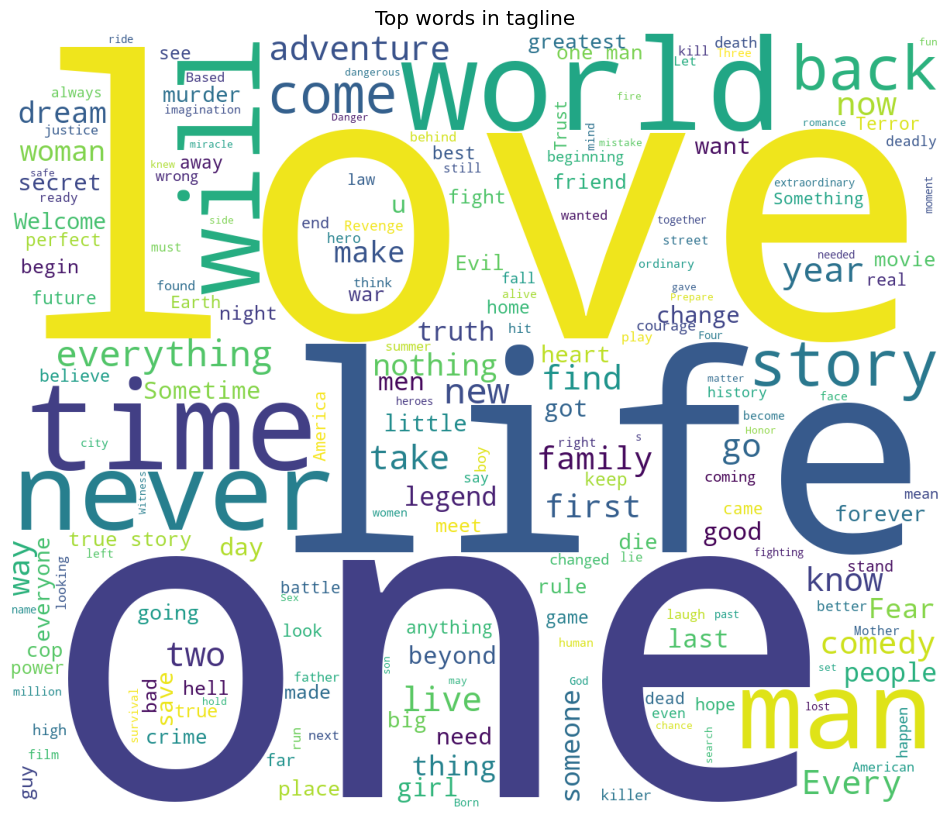

In [423]:
#tagline表示宣传标语、口号
plt.figure(figsize = (12, 12))
text = ' '.join(train['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

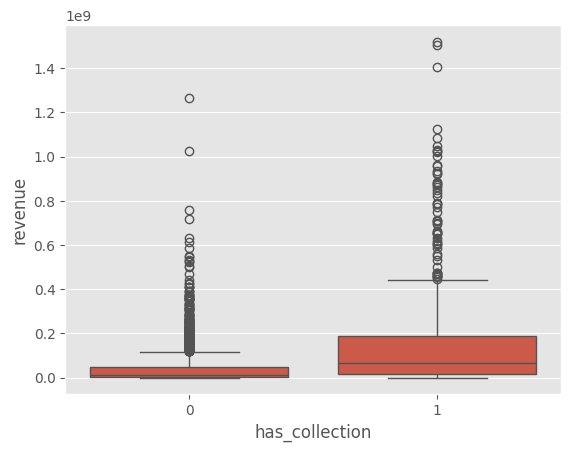

In [424]:
#has_collection 表示一部电影是否属于某个电影系列集合
sns.boxplot(x='has_collection', y='revenue', data=train);

f:\anaconda\envs\pytorch\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



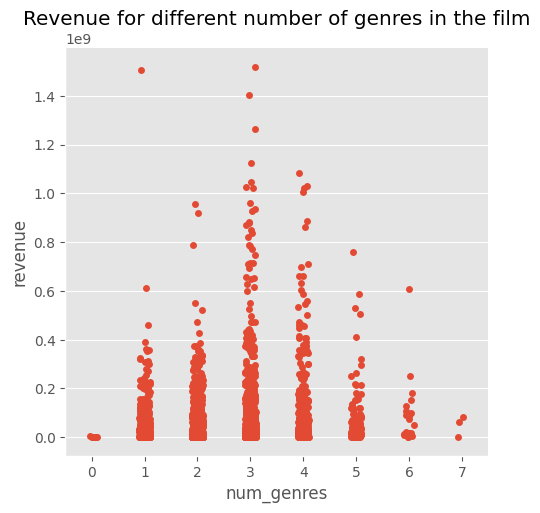

In [425]:
sns.catplot(x='num_genres', y='revenue', data=train);
plt.title('Revenue for different number of genres in the film');

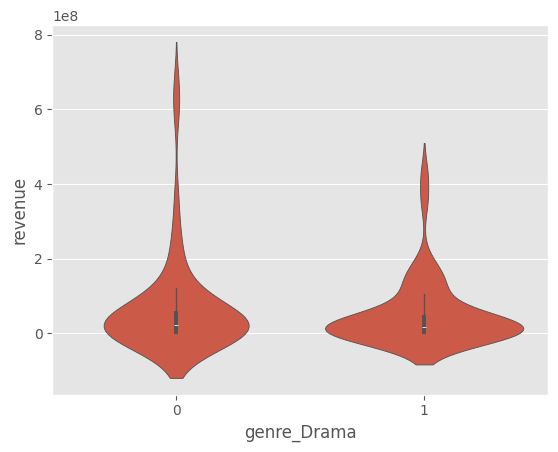

In [426]:
sns.violinplot(x='genre_Drama', y='revenue', data=train[:100]);

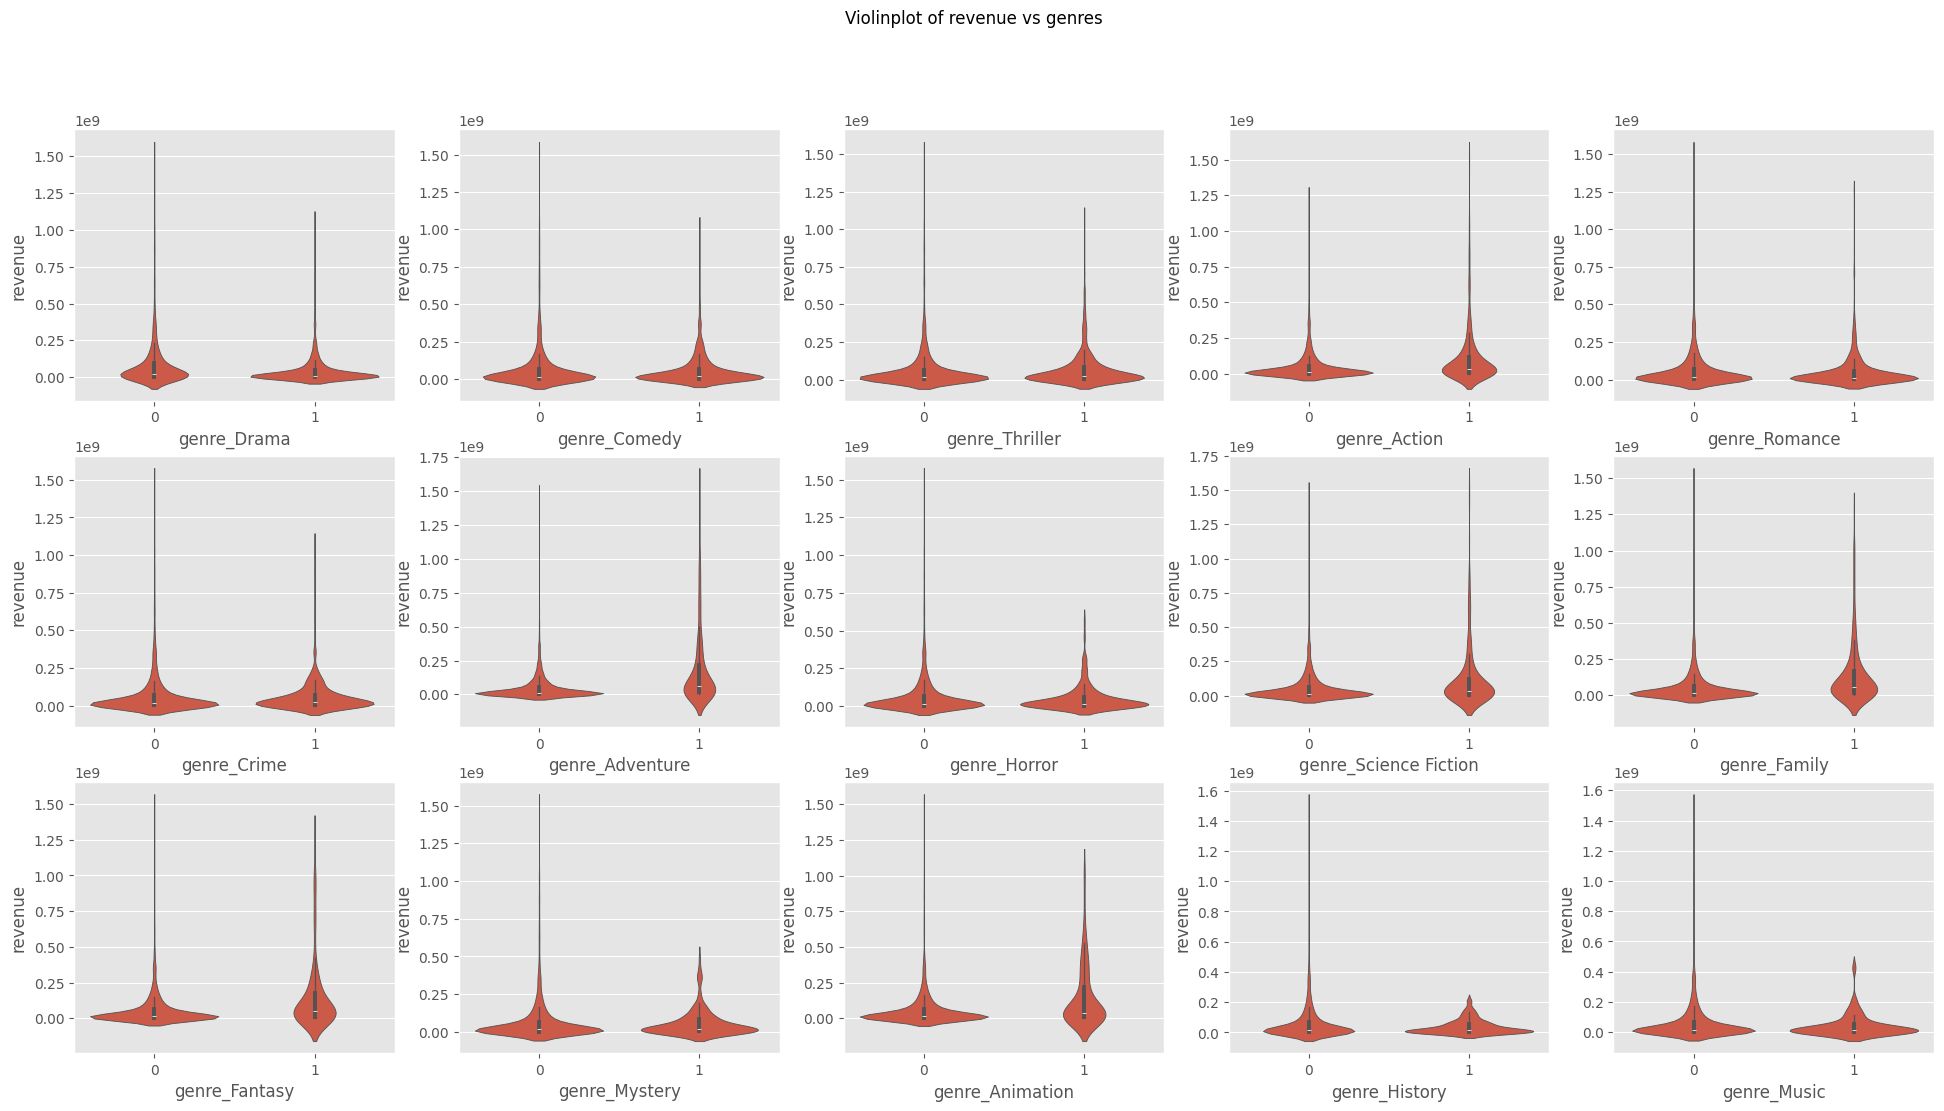

In [427]:
f, axes = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs genres')
for i, e in enumerate([col for col in train.columns if 'genre_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

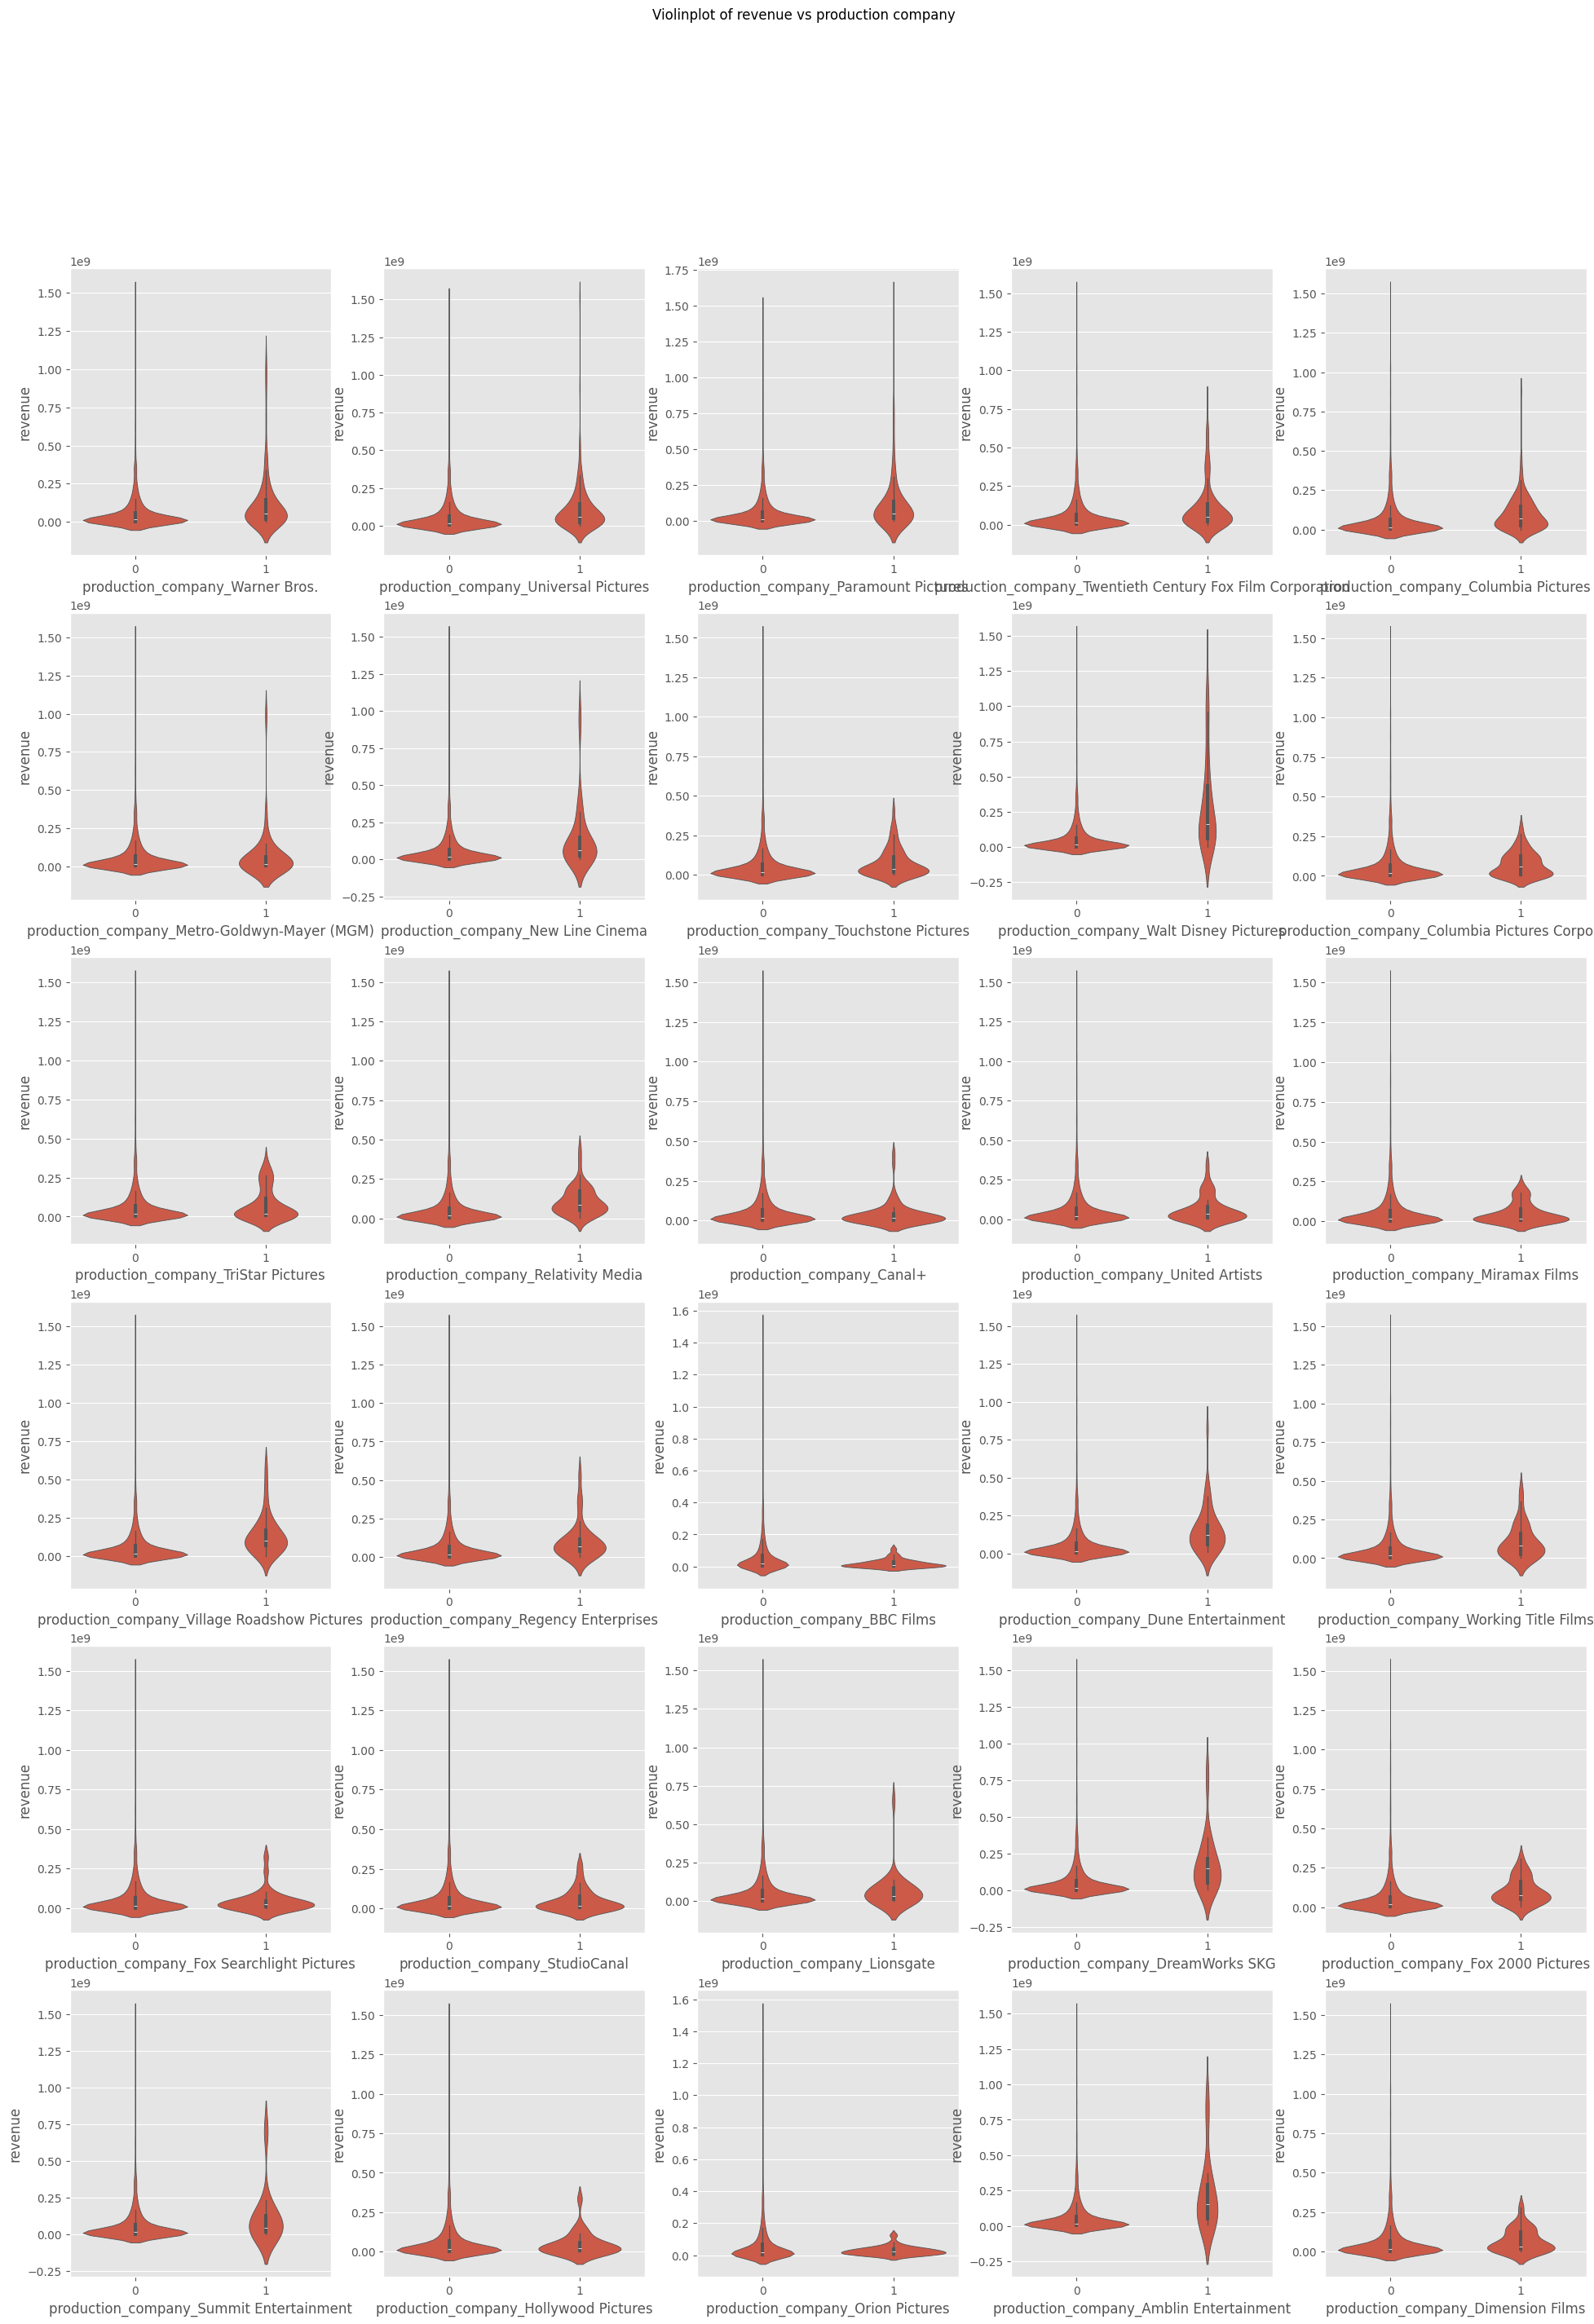

In [428]:
f, axes = plt.subplots(6, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs production company')
for i, e in enumerate([col for col in train.columns if 'production_company' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

f:\anaconda\envs\pytorch\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



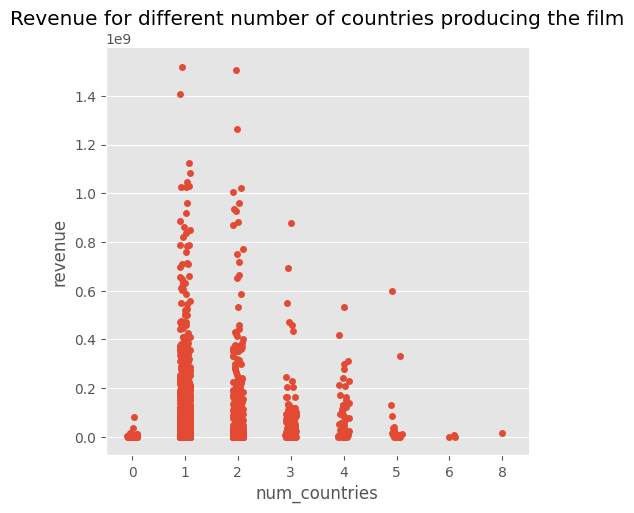

In [429]:
sns.catplot(x='num_countries', y='revenue', data=train);
plt.title('Revenue for different number of countries producing the film');

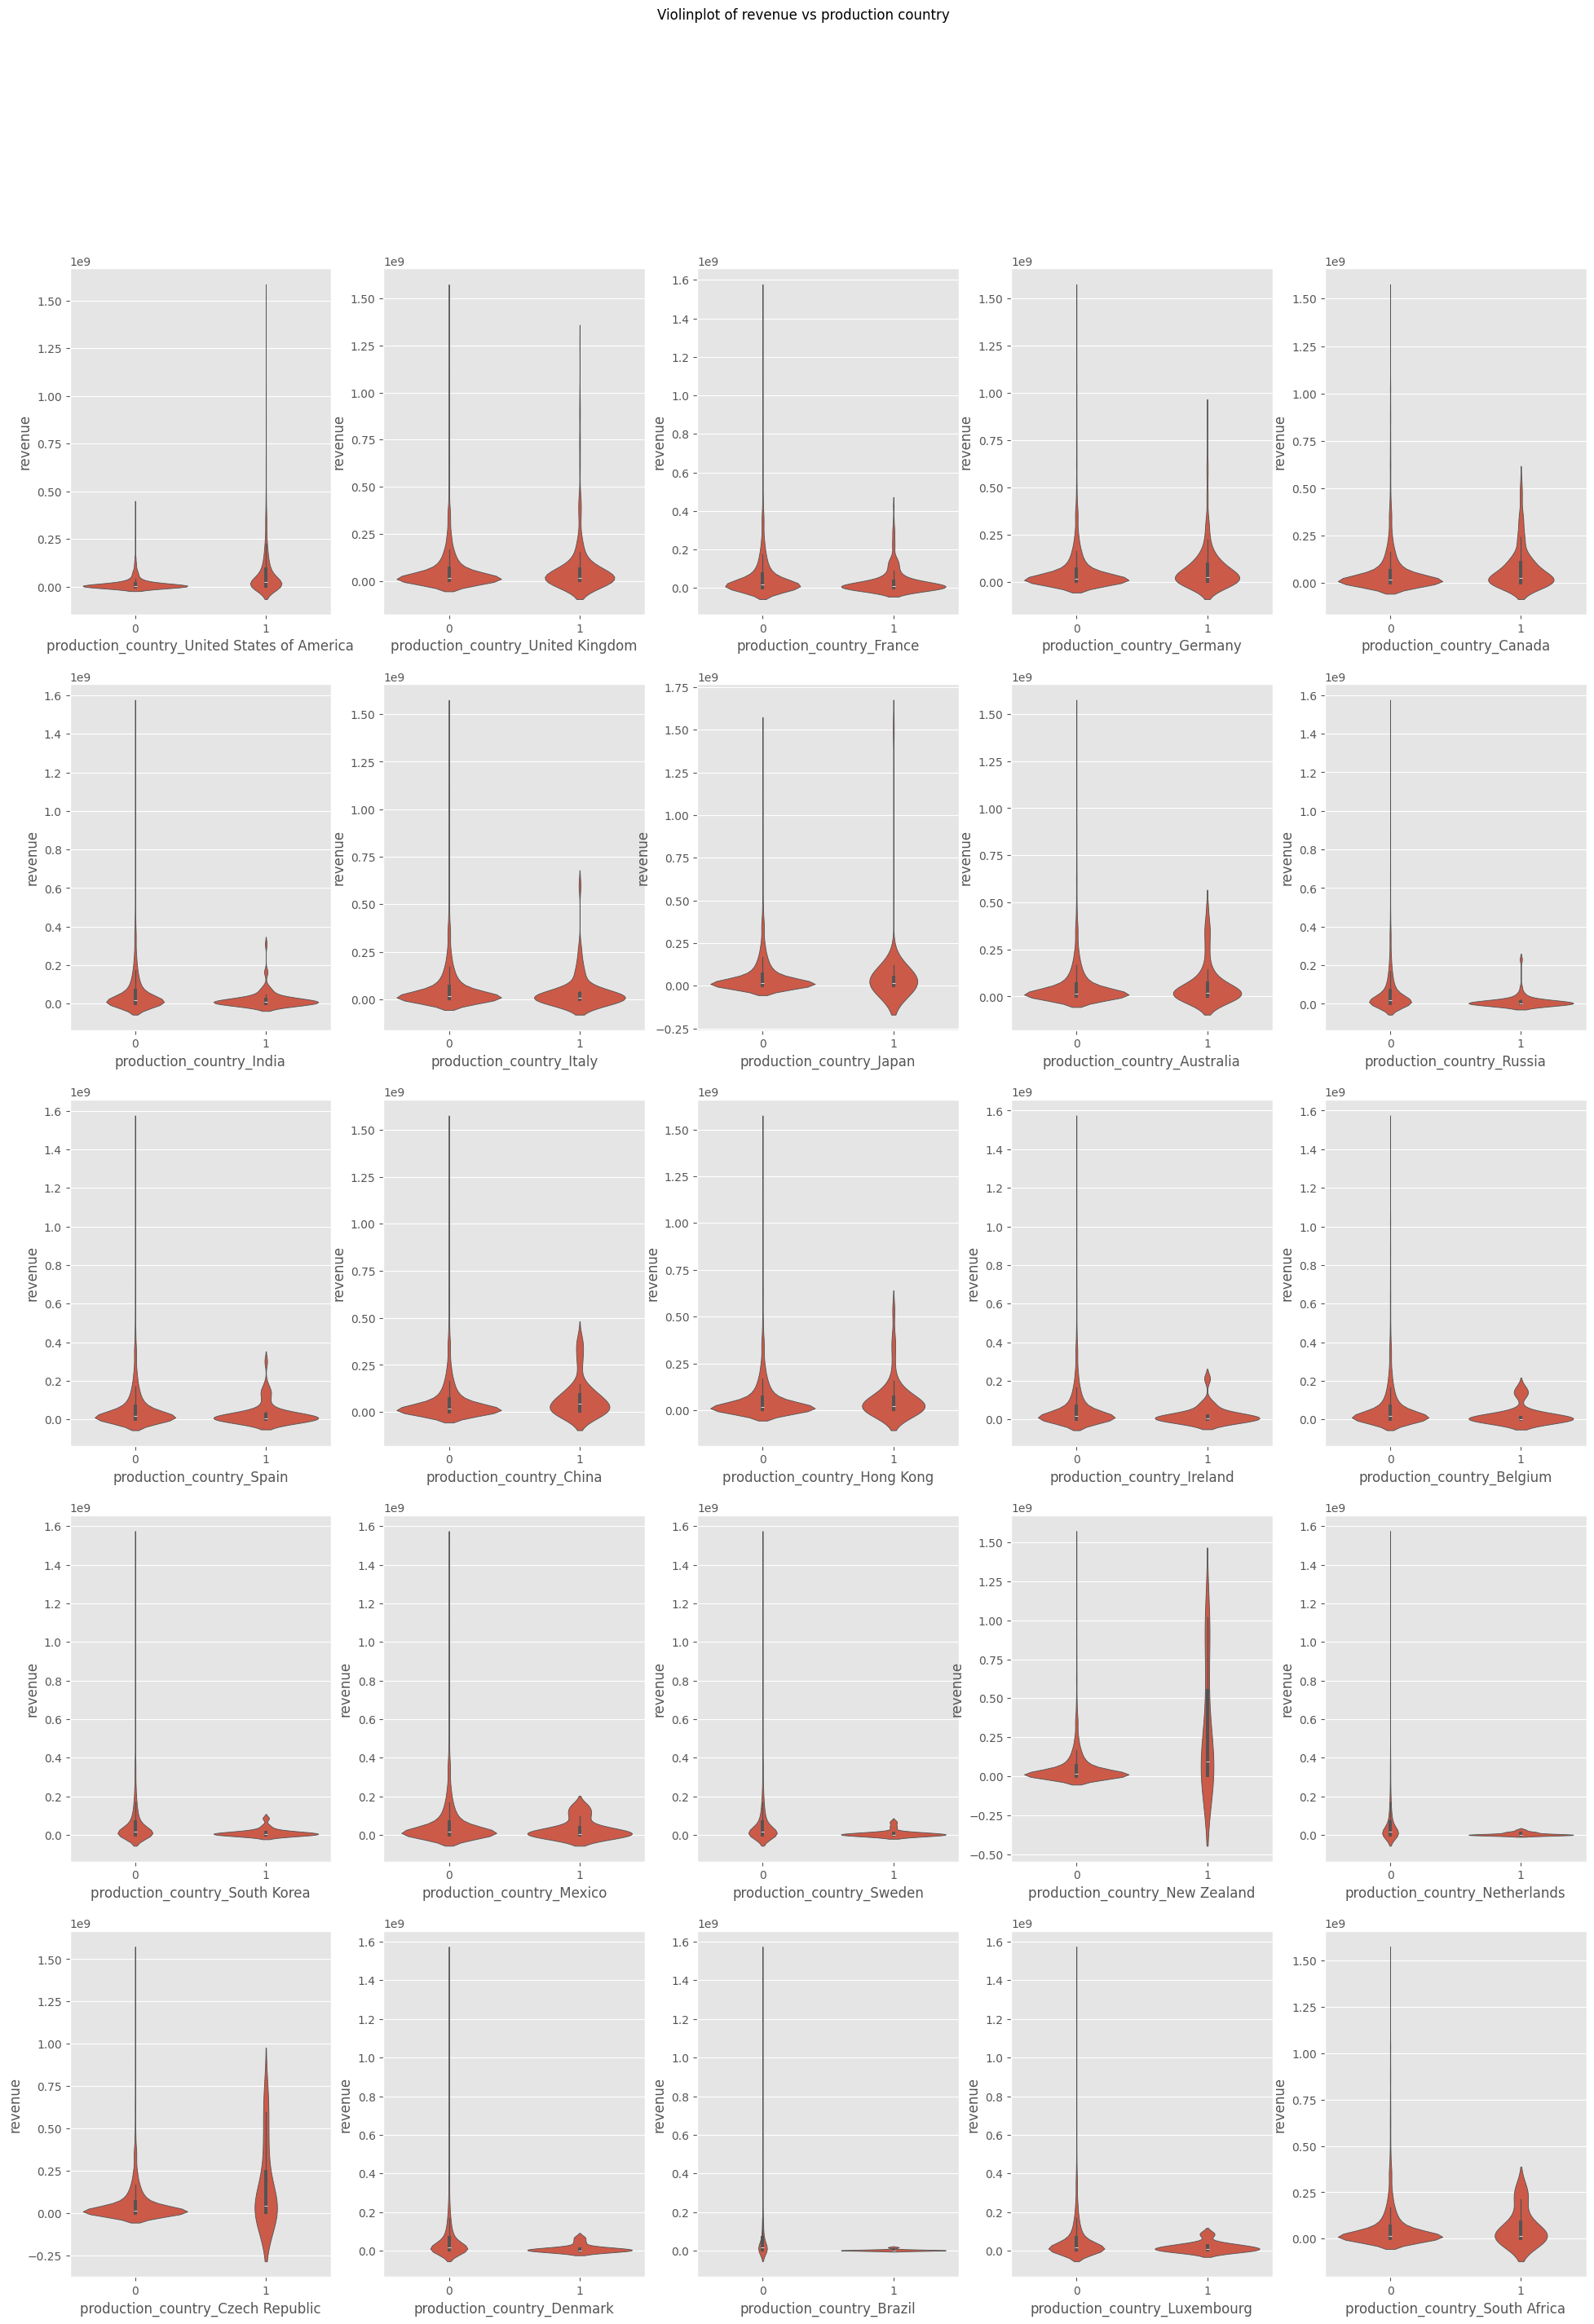

In [430]:
f, axes = plt.subplots(5, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs production country')
for i, e in enumerate([col for col in train.columns if 'production_country' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

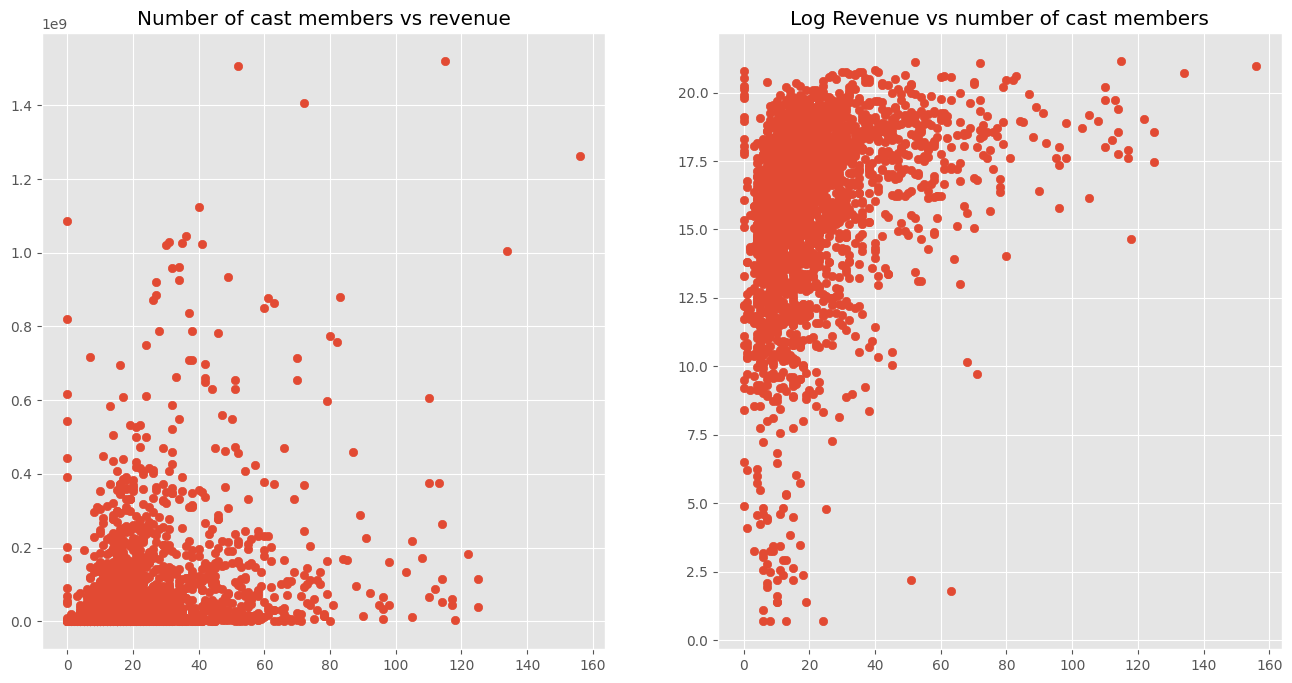

In [431]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['num_cast'], train['revenue'])
plt.title('Number of cast members vs revenue');
plt.subplot(1, 2, 2)
plt.scatter(train['num_cast'], train['log_revenue'])
plt.title('Log Revenue vs number of cast members');

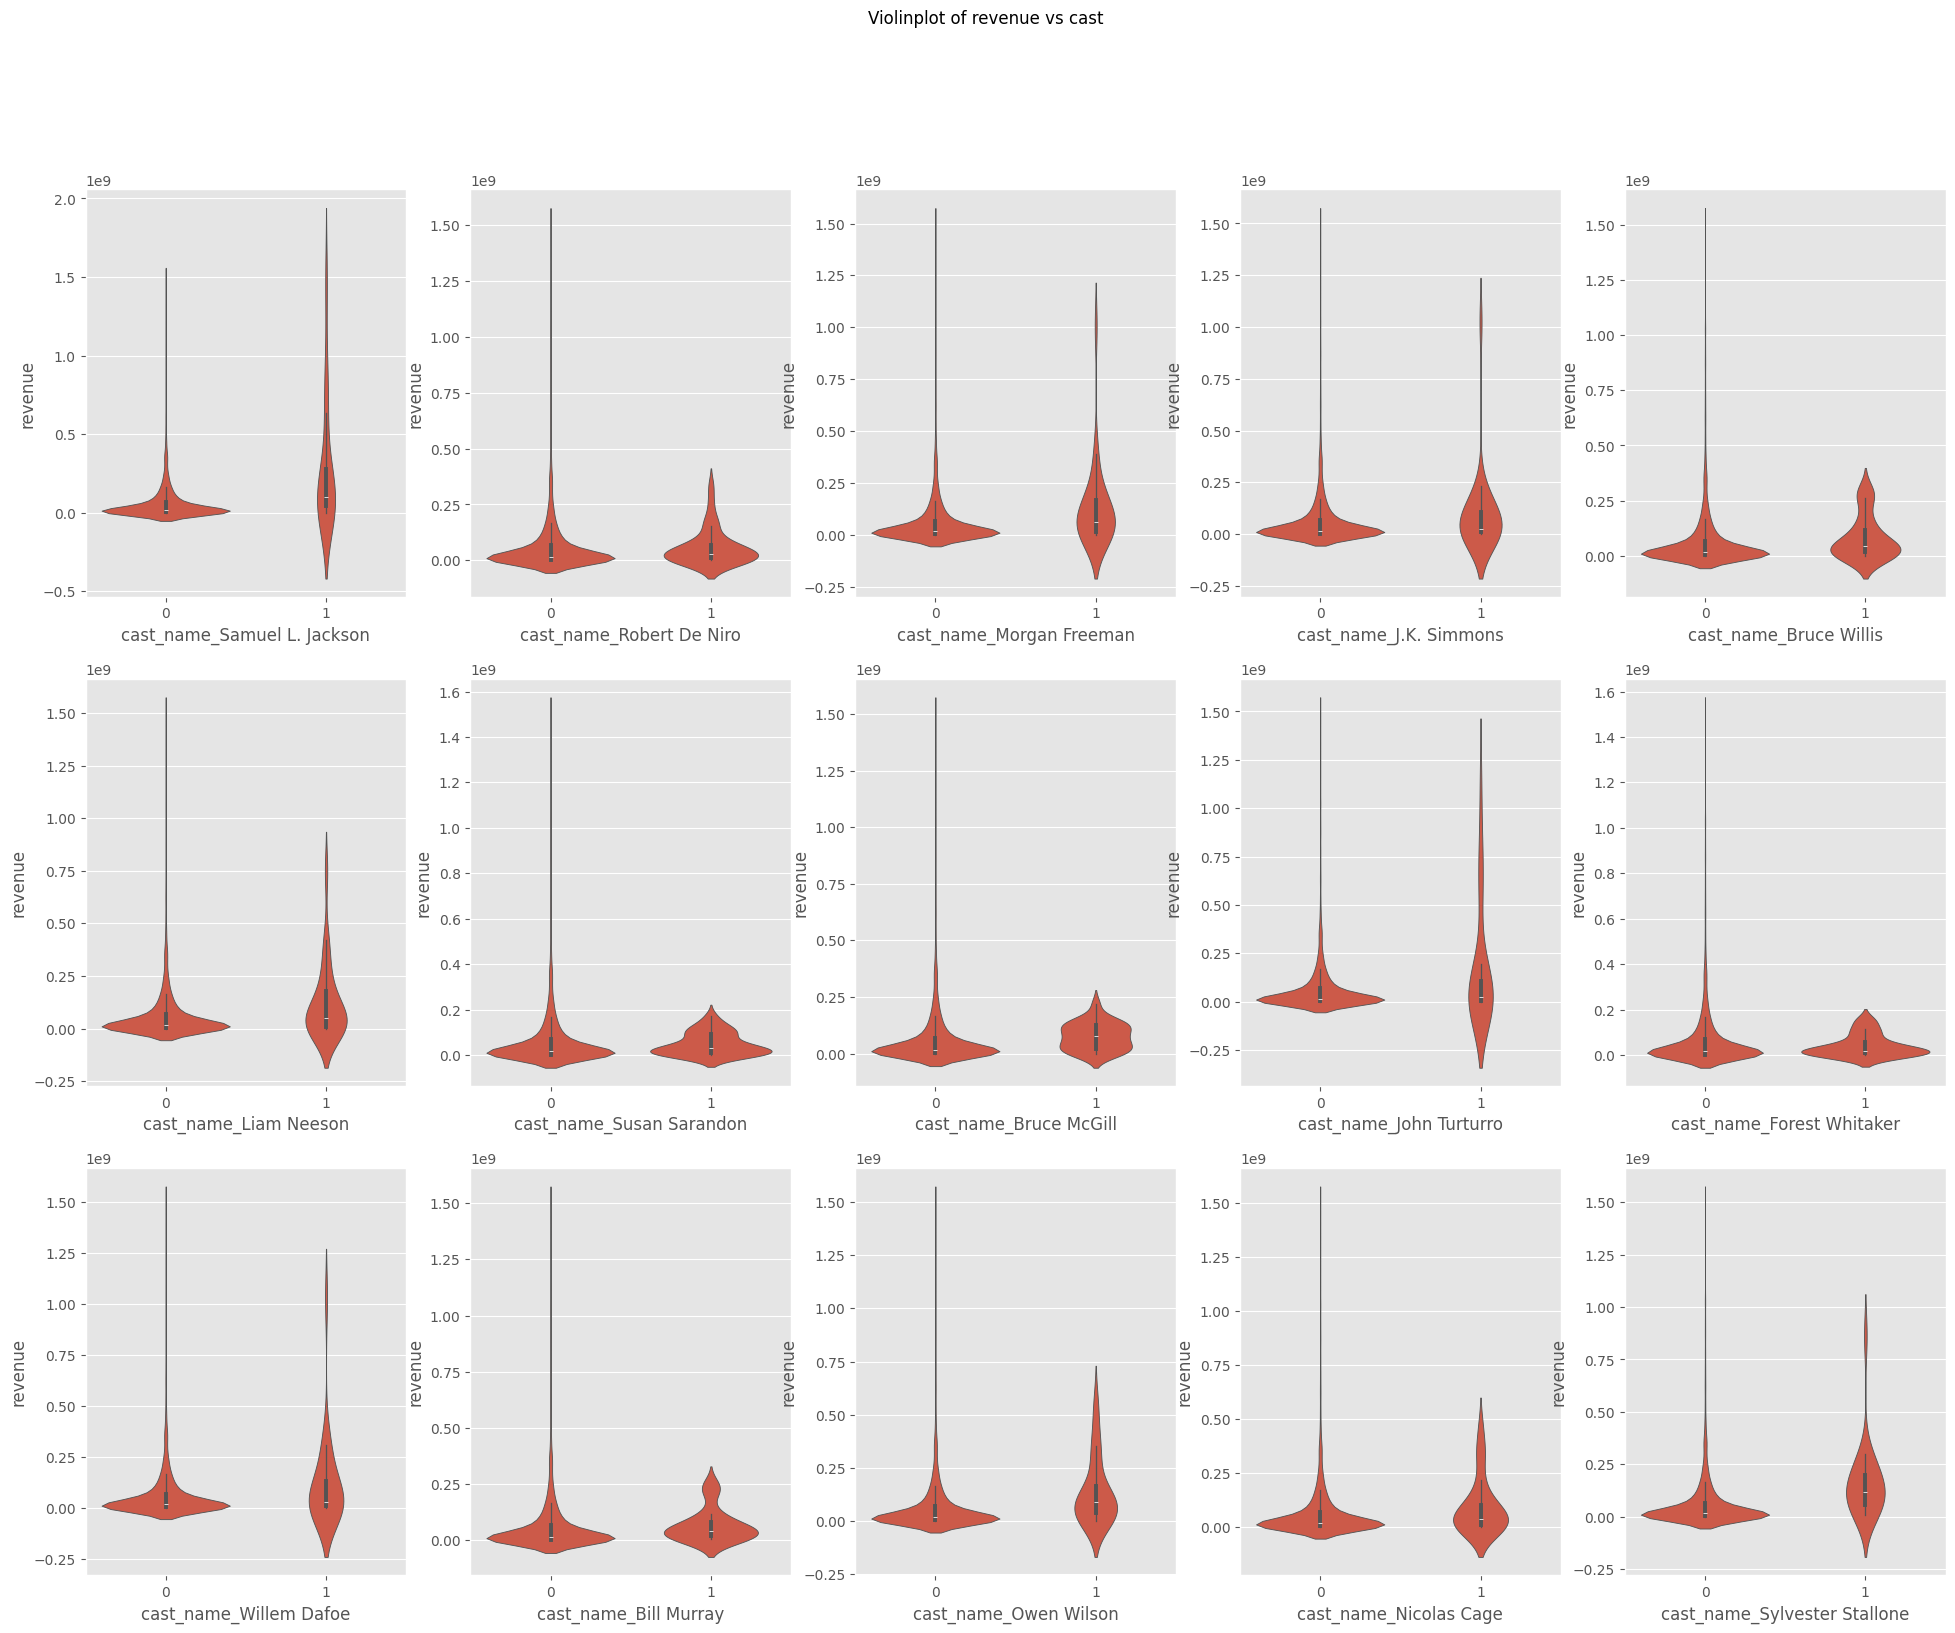

In [432]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('Violinplot of revenue vs cast')
for i, e in enumerate([col for col in train.columns if 'cast_name' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

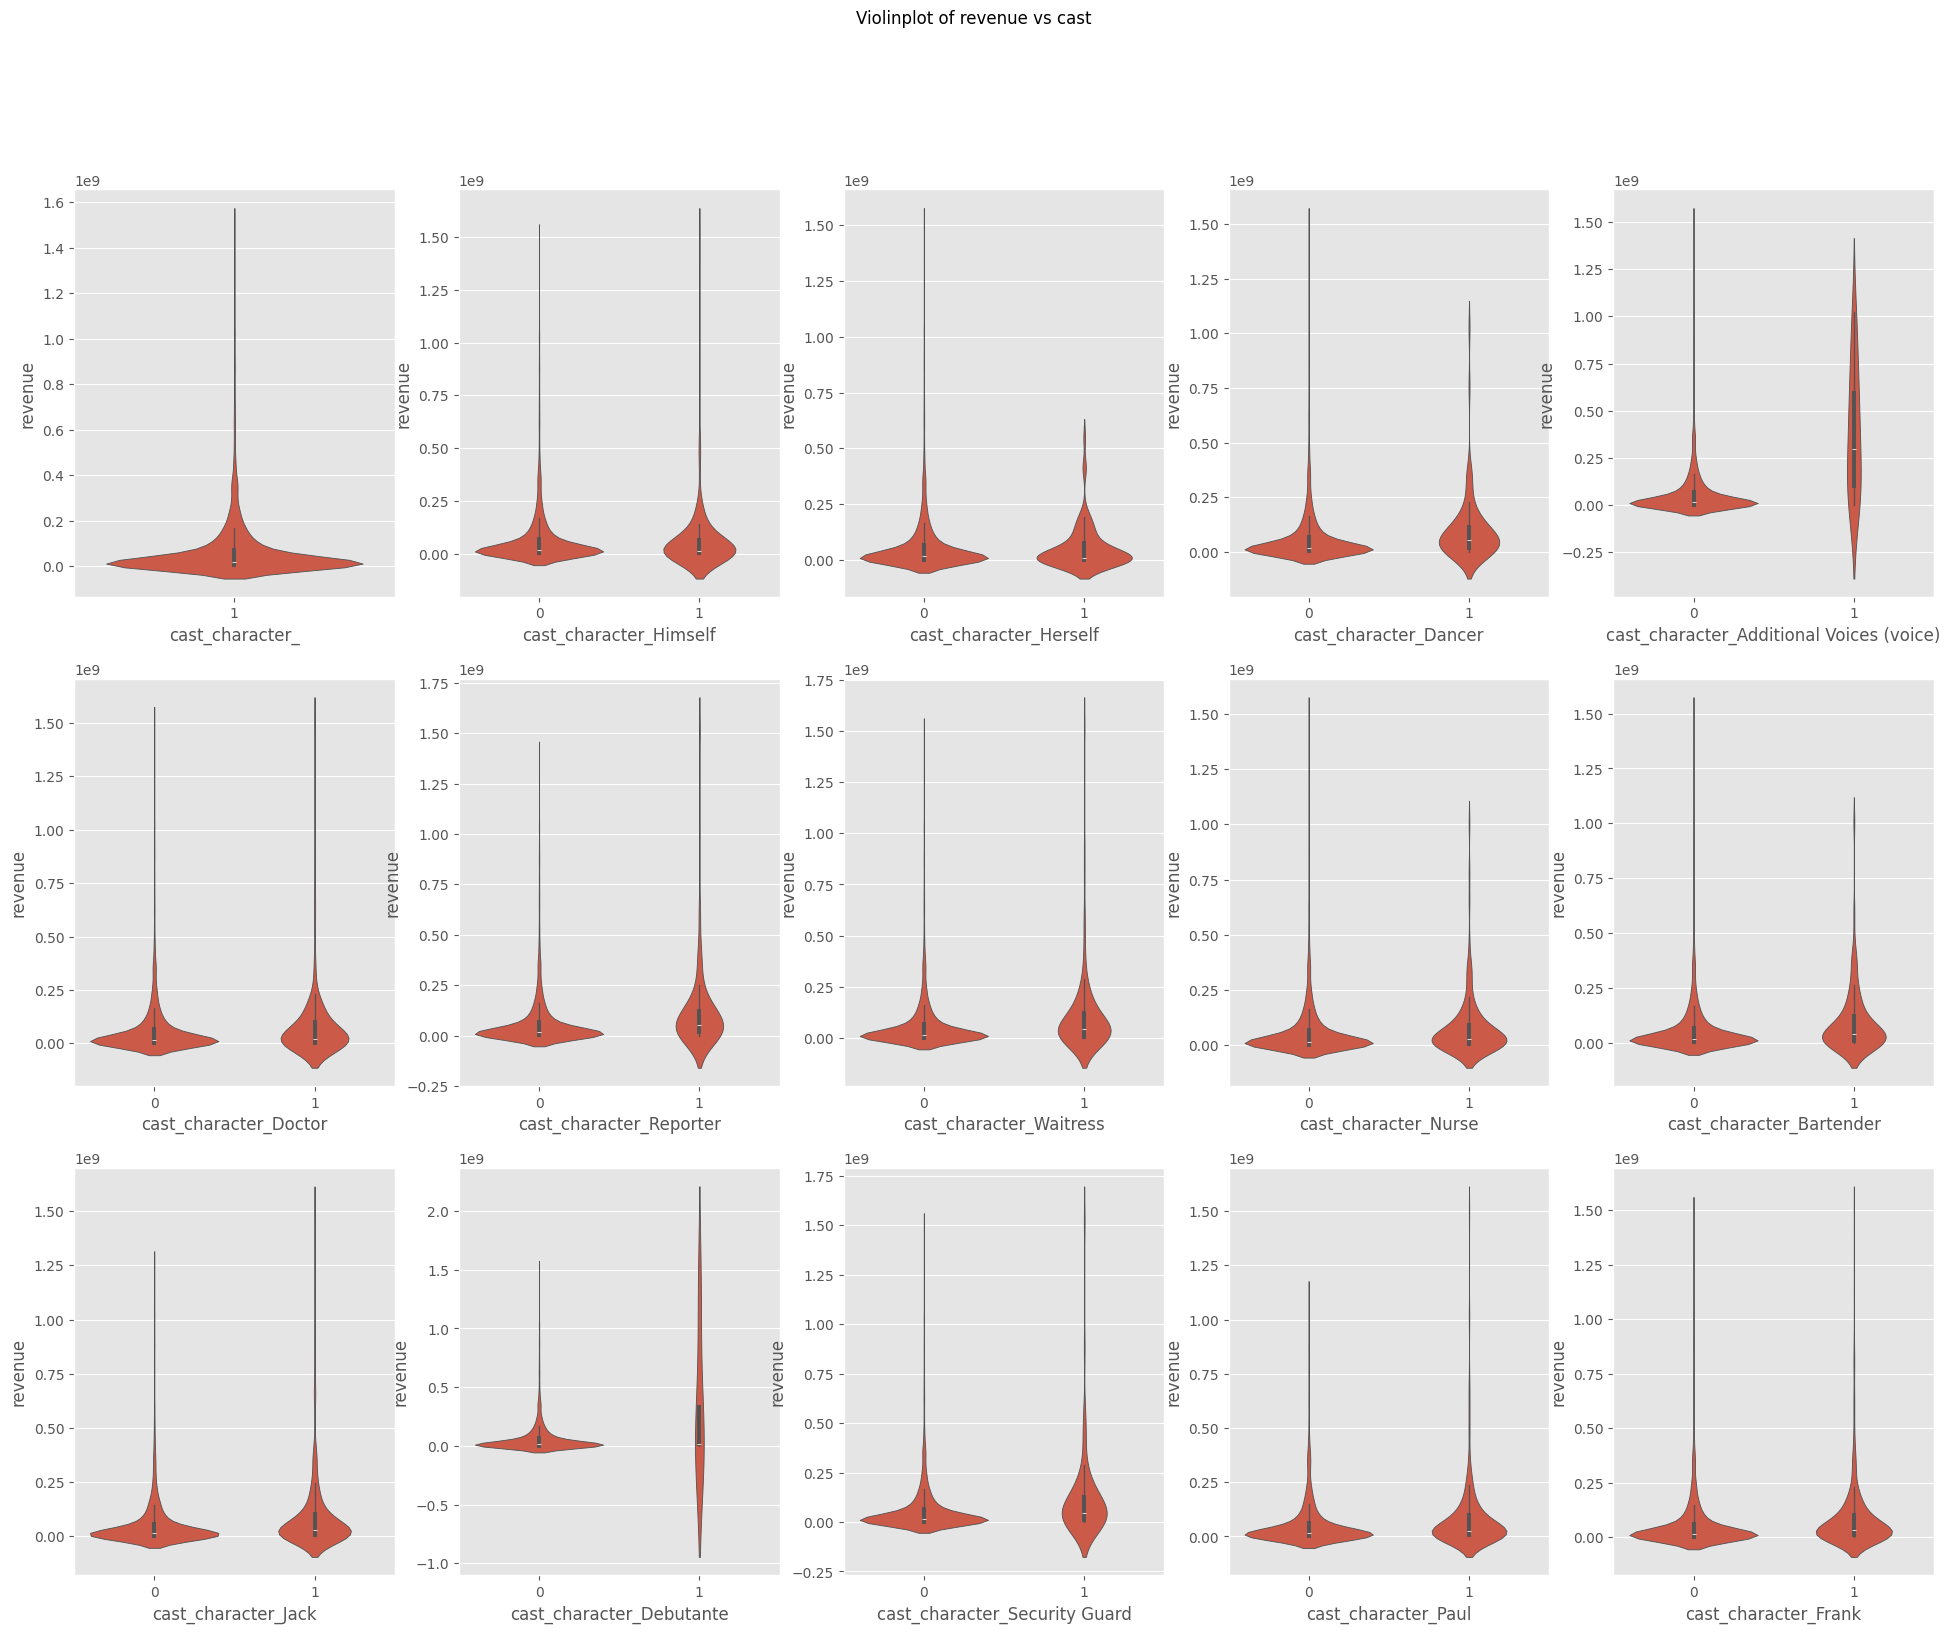

In [433]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('Violinplot of revenue vs cast')
for i, e in enumerate([col for col in train.columns if 'cast_character_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

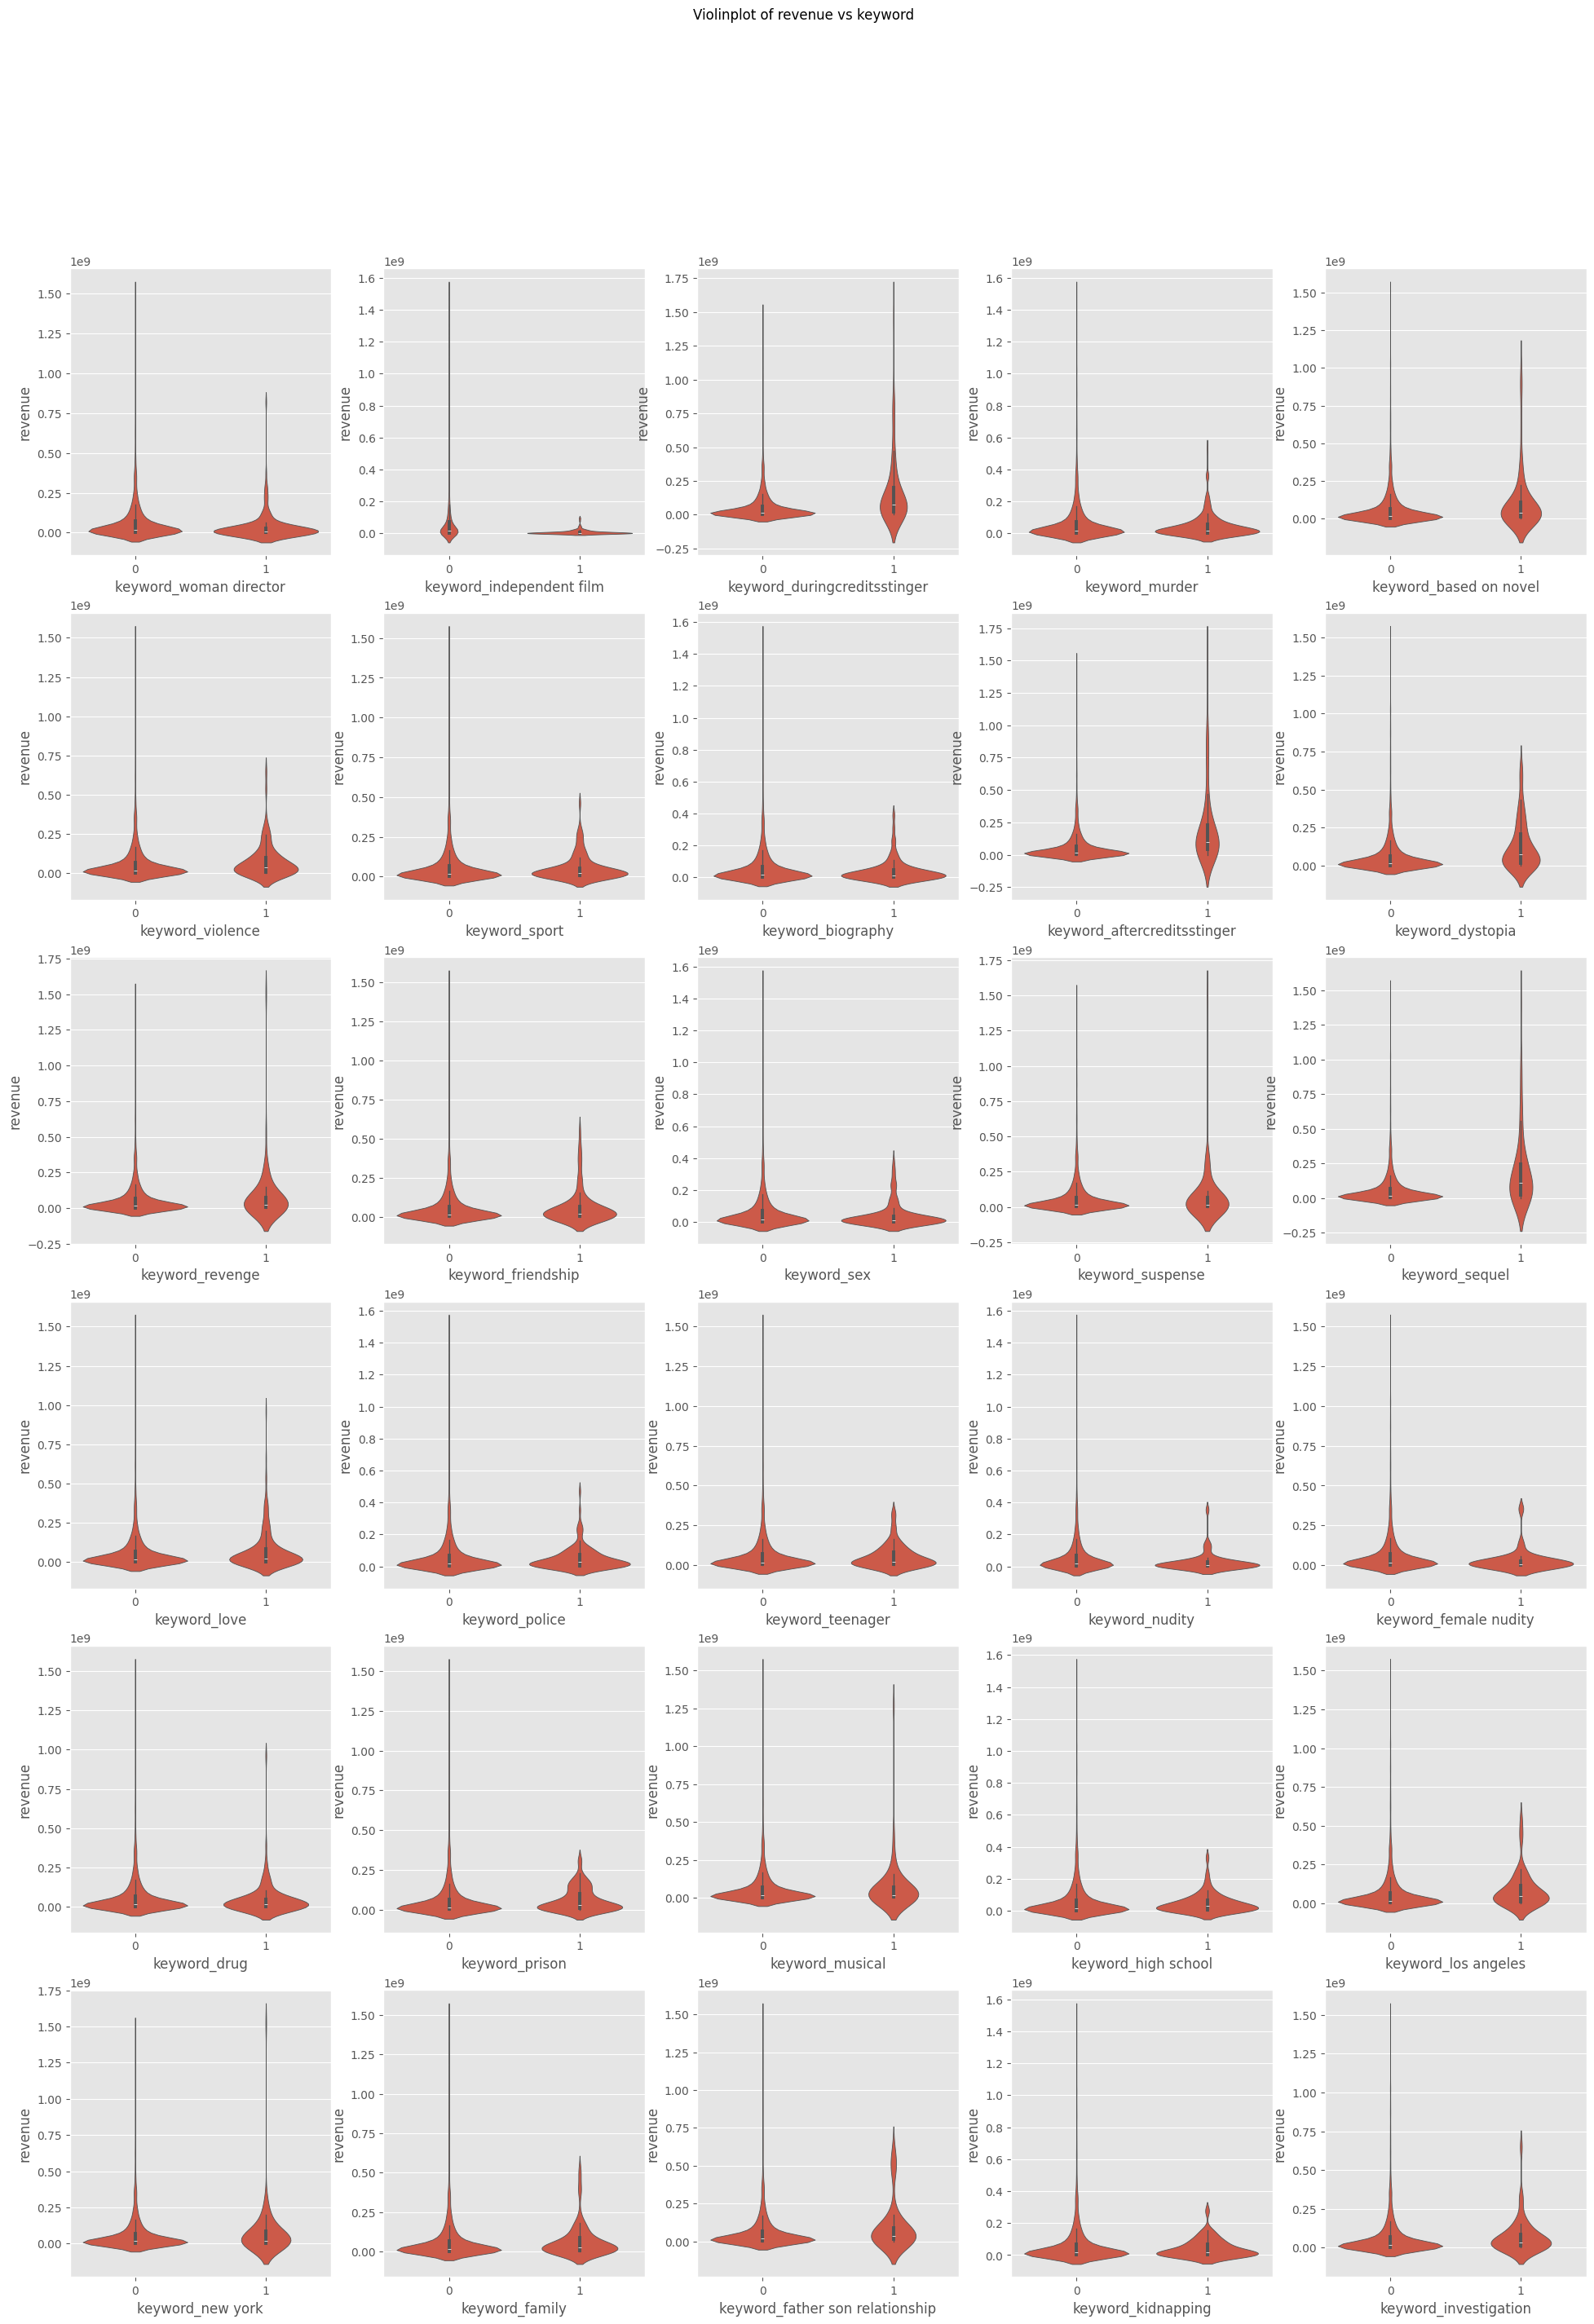

In [434]:
f, axes = plt.subplots(6, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs keyword')
for i, e in enumerate([col for col in train.columns if 'keyword_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

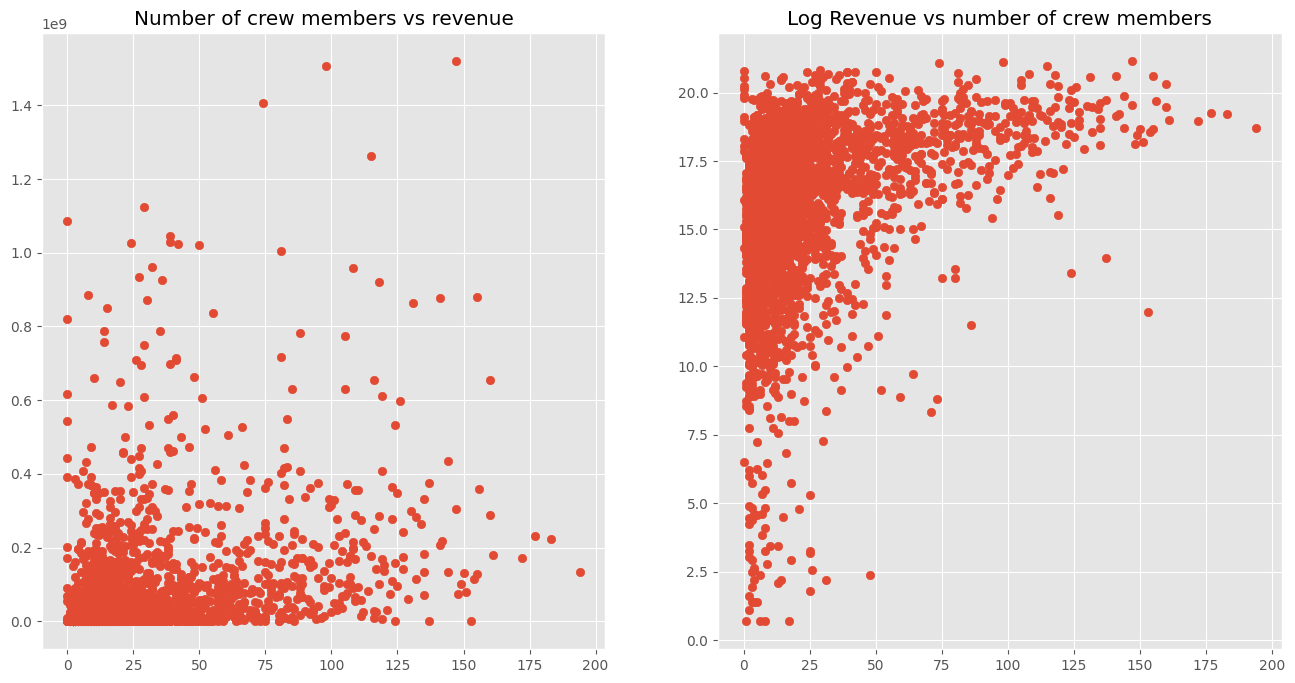

In [435]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['num_crew'], train['revenue'])
plt.title('Number of crew members vs revenue');
plt.subplot(1, 2, 2)
plt.scatter(train['num_crew'], train['log_revenue'])
plt.title('Log Revenue vs number of crew members');

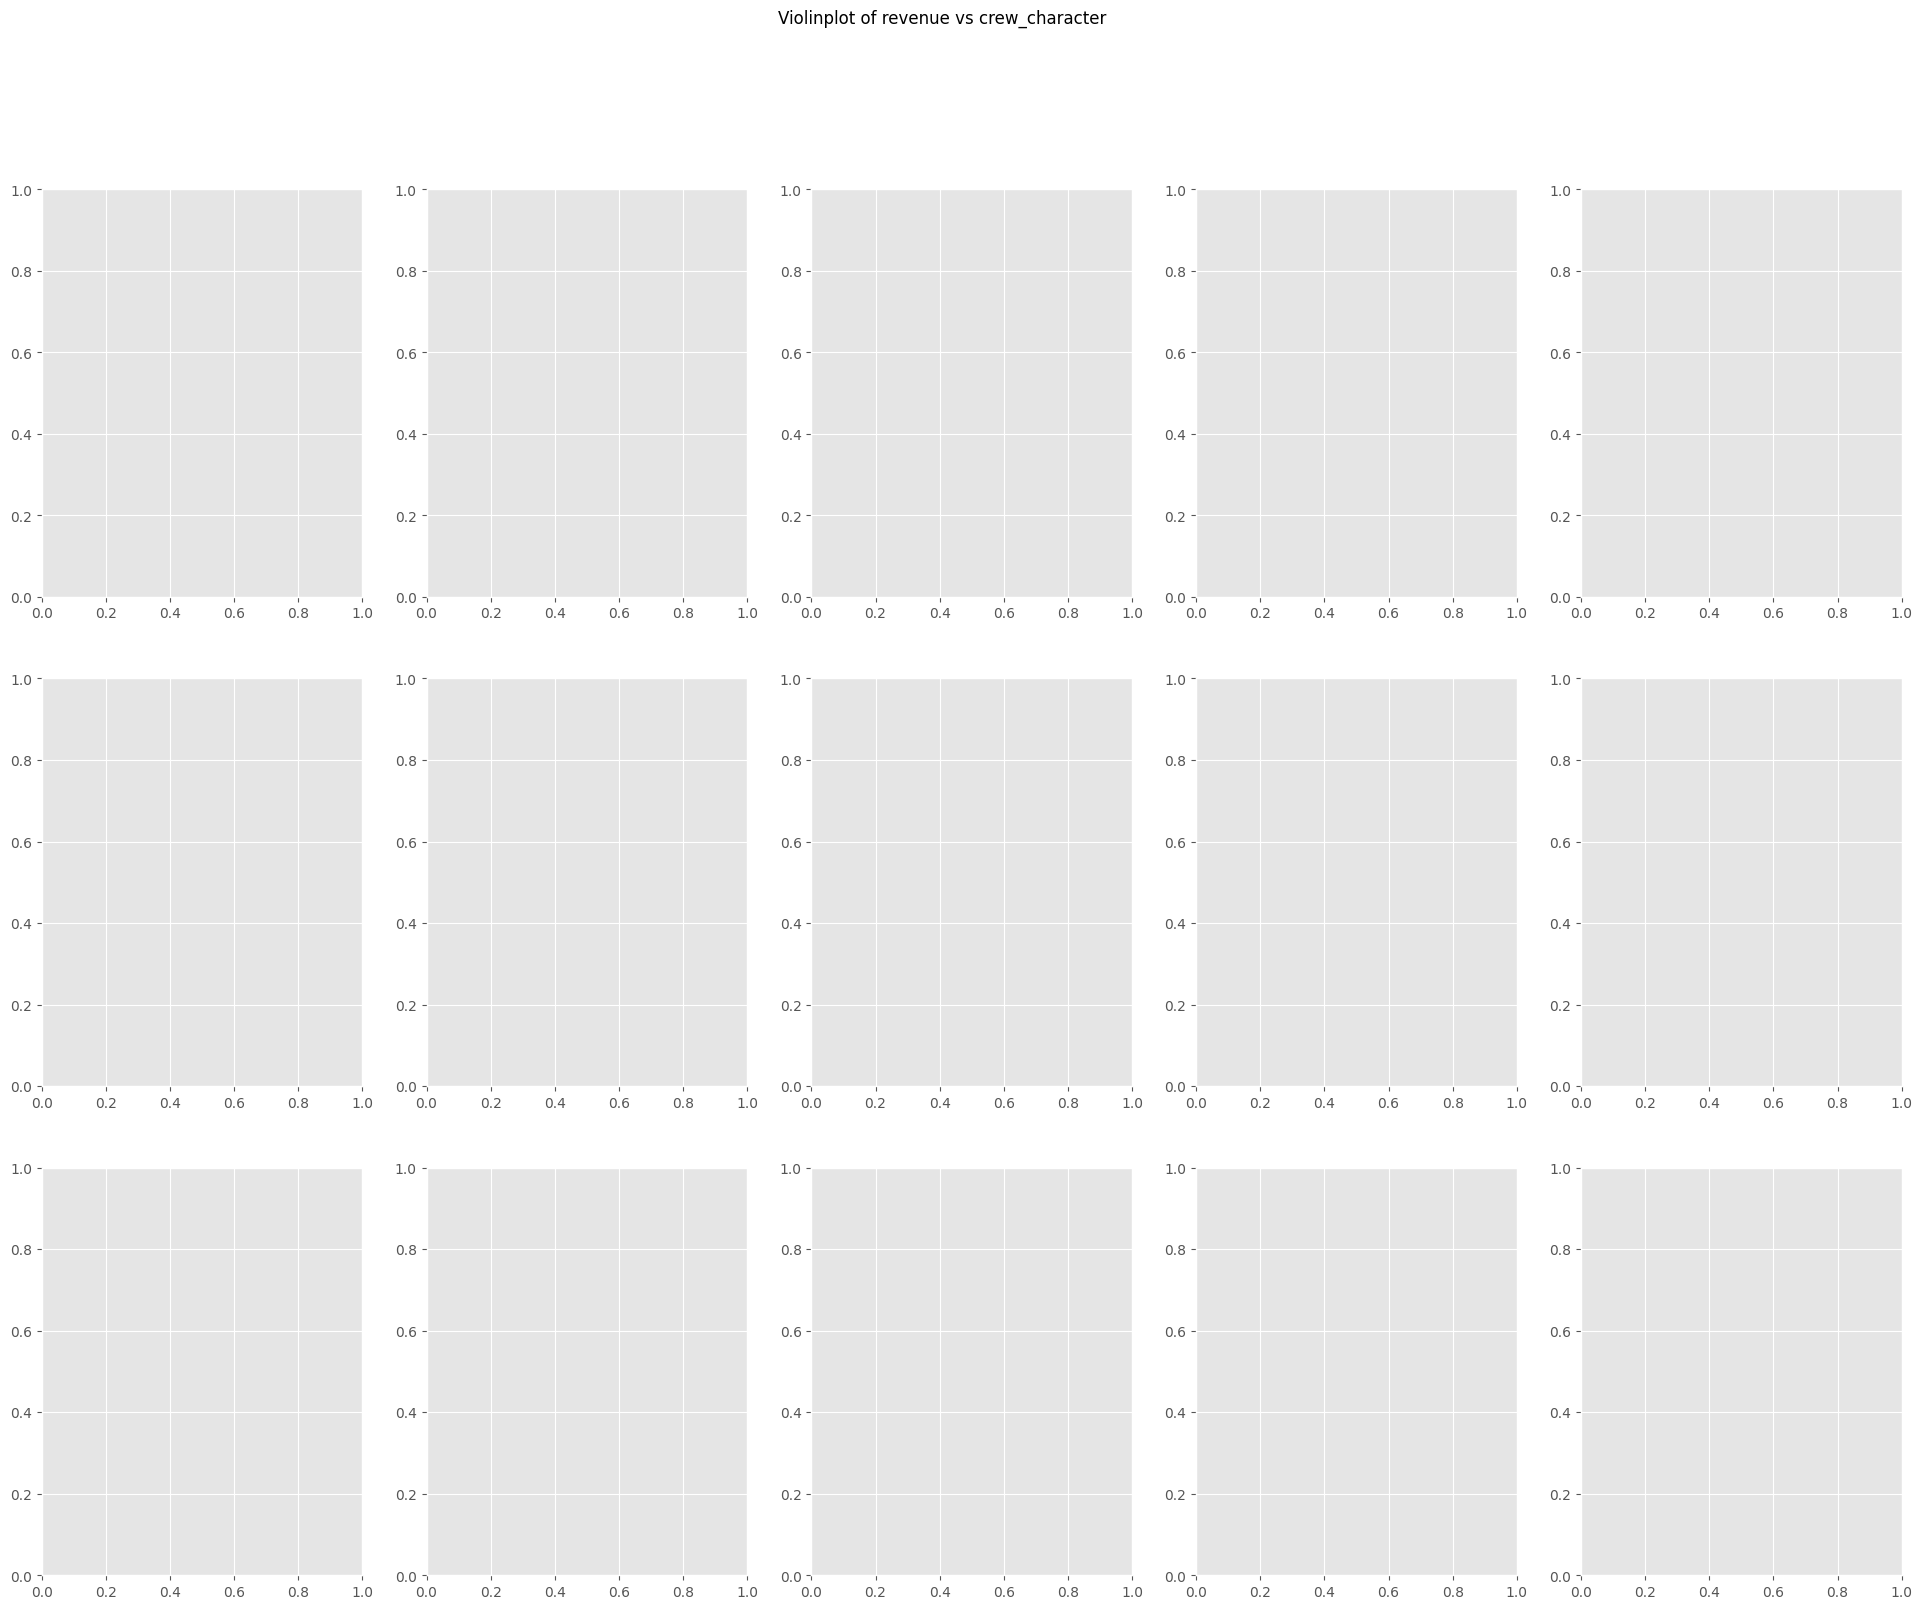

In [436]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('Violinplot of revenue vs crew_character')
for i, e in enumerate([col for col in train.columns if 'crew_character_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

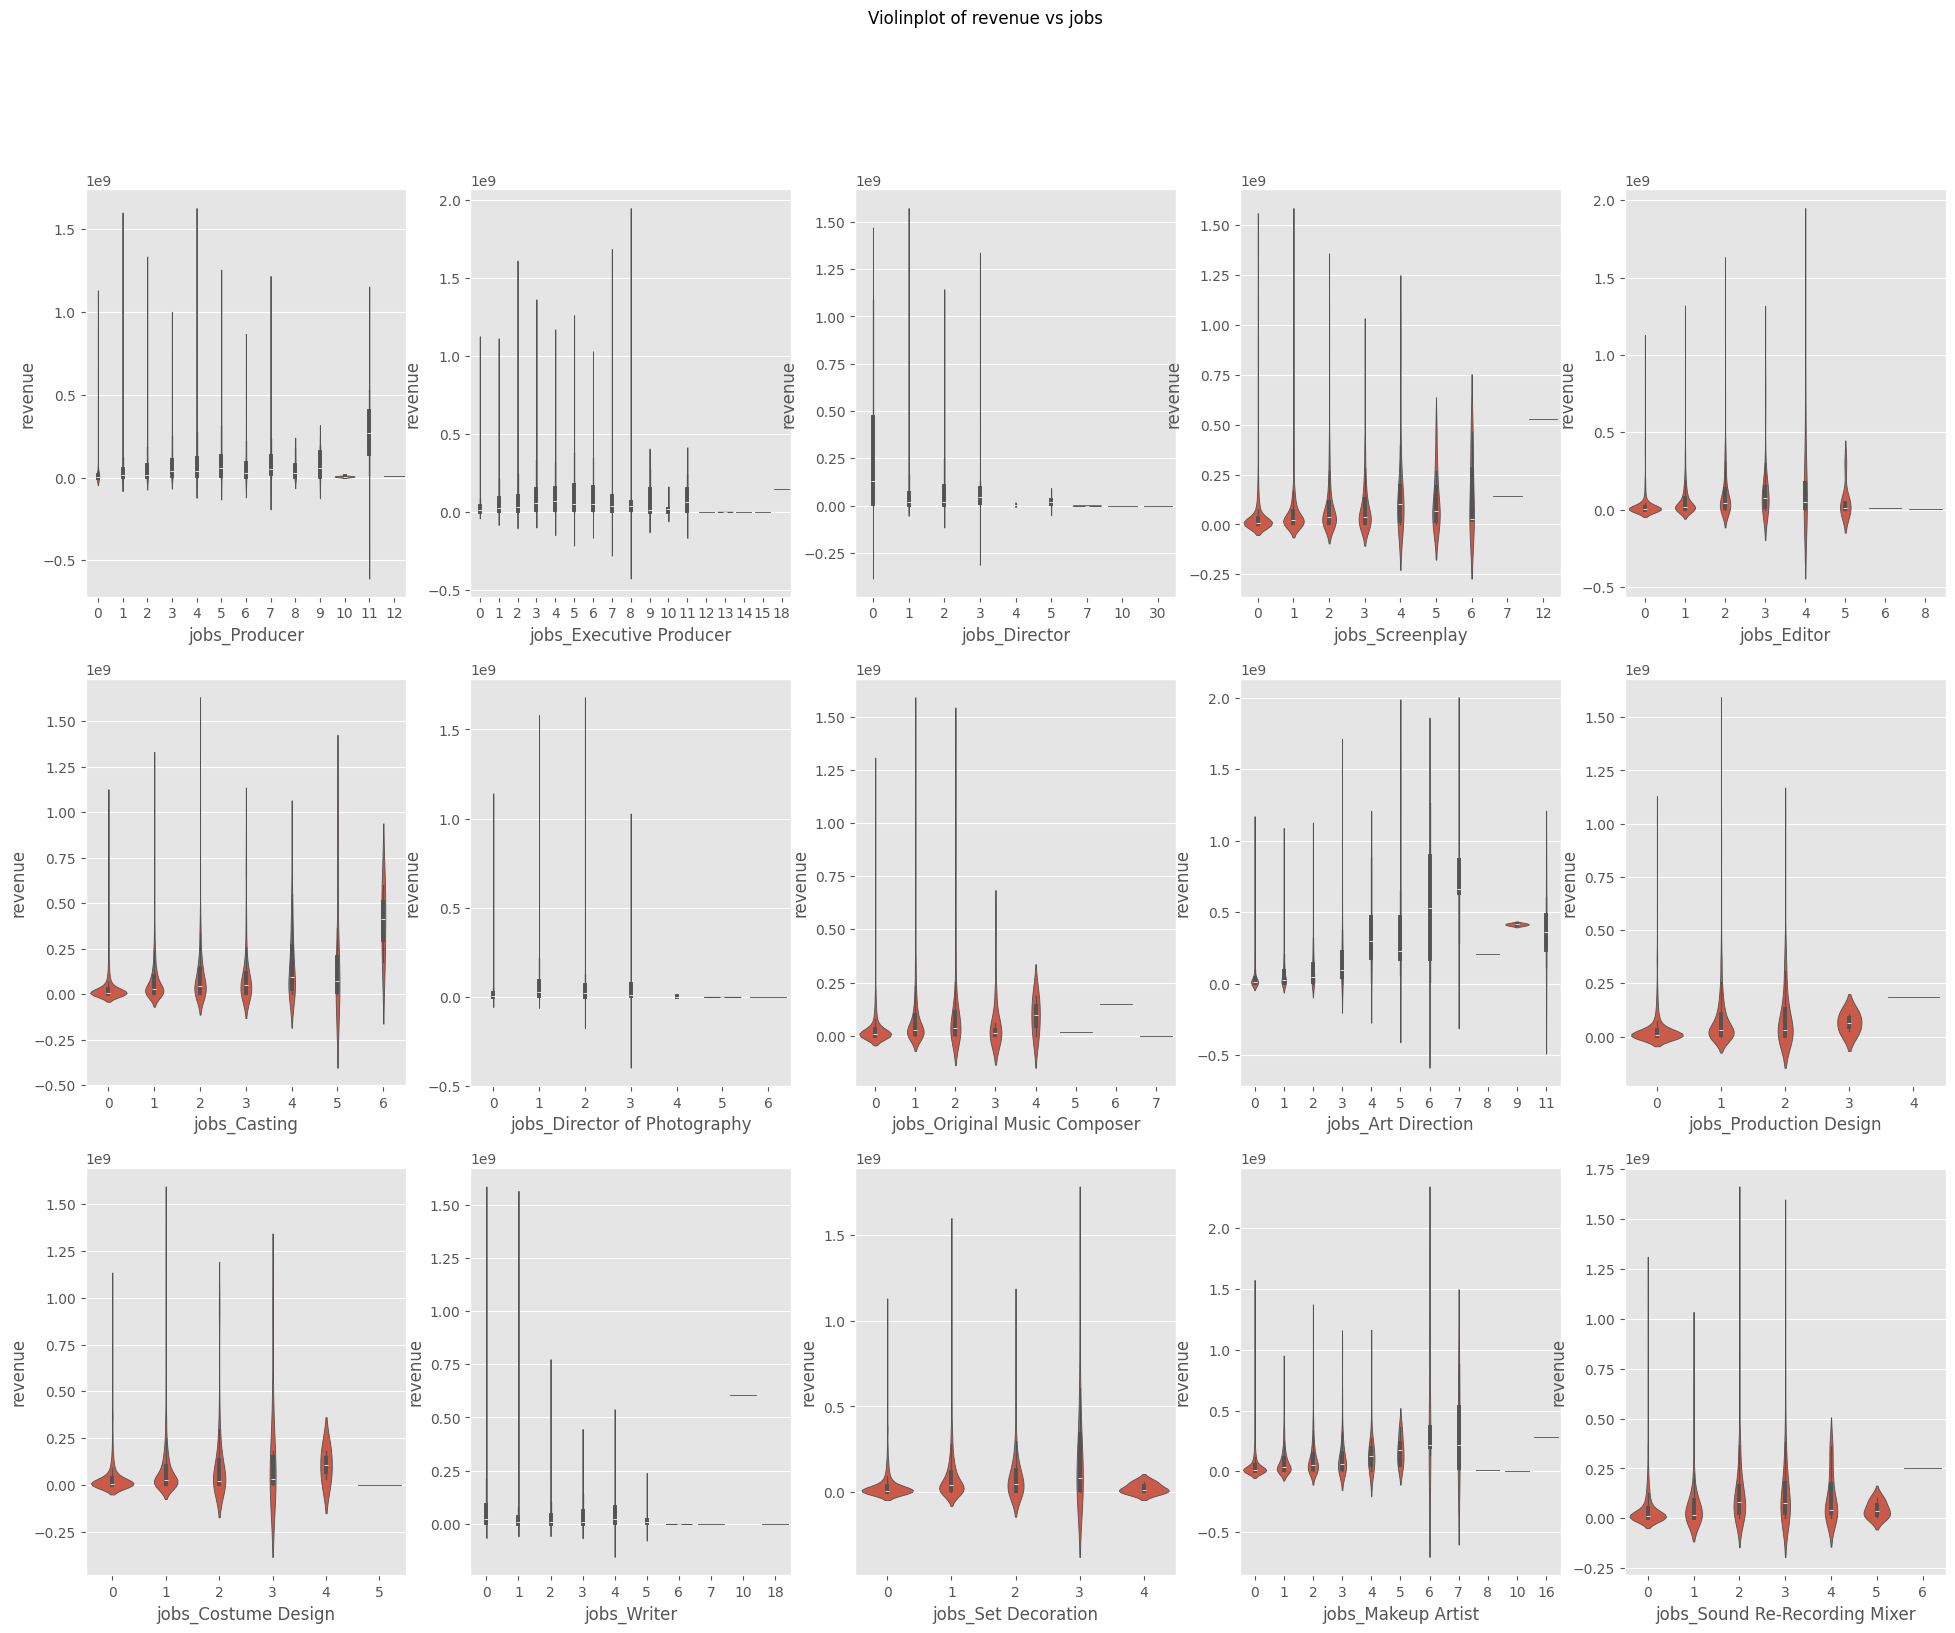

In [437]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('Violinplot of revenue vs jobs')
for i, e in enumerate([col for col in train.columns if 'jobs_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

In [438]:
train = train.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status', 'log_revenue'], axis=1)
test = test.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status'], axis=1)

In [439]:
train.shape, test.shape

((3000, 236), (4398, 235))

In [440]:
for col in train.columns:
    if train[col].nunique() == 1:
        print(col)
        train = train.drop([col], axis=1)
        test = test.drop([col], axis=1)

language_
cast_character_


In [441]:
for col in ['original_language', 'collection_name', 'all_genres']:
    #对 train 和 test 数据集中的 original_language、collection_name 和 all_genres 这三列分类特征进行编码转换
    # 将文本形式的类别标签转换为整数编码，以便后续的机器学习模型能够处理这些数据。
    le = LabelEncoder()
    #将 train 和 test 数据集中当前列的数据合并成一个列表。
    # 让 LabelEncoder 对象 le 学习这个合并列表中的所有唯一值，并为每个唯一值分配一个整数编码。
    le.fit(list(train[col].fillna('')) + list(test[col].fillna('')))#学习
    #le.transform(...) 使用之前拟合好的 LabelEncoder 对象 le 对 train 数据集中当前列的数据进行编码转换，将每个类别标签替换为对应的整数编码。
    train[col] = le.transform(train[col].fillna('').astype(str))#转换
    test[col] = le.transform(test[col].fillna('').astype(str))

In [442]:
train_texts = train[['title', 'tagline', 'overview', 'original_title']]
test_texts = test[['title', 'tagline', 'overview', 'original_title']]

In [443]:
for col in ['title', 'tagline', 'overview', 'original_title']:
    #从title这个属性分为了len_title（字符串长度）和words_title（单词个数）这两个属性
    train['len_' + col] = train[col].fillna('').apply(lambda x: len(str(x)))
    train['words_' + col] = train[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    train = train.drop(col, axis=1)
    
    test['len_' + col] = test[col].fillna('').apply(lambda x: len(str(x)))
    test['words_' + col] = test[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    test = test.drop(col, axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1414830523.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1414830523.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\1414830523.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [444]:
# data fixes from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

power_six = train.id[train.budget > 1000][train.revenue < 100]

for k in power_six :
    train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000

In [445]:
X = train.drop(['id', 'revenue'], axis=1)
y = np.log1p(train['revenue'])
X_test = test.drop(['id'], axis=1)

In [446]:
#test_size=0.1：这个参数指定了验证集在整个数据集中所占的比例。这里 test_size = 0.1 表示将数据集的 10% 作为验证集，剩下的 90% 作为训练集。
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

In [447]:
params = {'num_leaves': 30,   #决策树的最大叶子节点数
         'min_data_in_leaf': 20,     #每个叶子节点最少需要的样本数
         'objective': 'regression',  #模型的目标函数
         'max_depth': 5,             #决策树的最大深度
         'learning_rate': 0.01,      #学习率
         "boosting": "gbdt",         #提升类型，设置为 "gbdt" 表示使用梯度提升决策树
         "feature_fraction": 0.9,    #每次迭代中使用的特征比例
         "bagging_freq": 1,          #bagging 的频率
         "bagging_fraction": 0.9,    #每次 bagging 操作中使用的样本比例
         "bagging_seed": 11,         #bagging 操作的随机种子
         "metric": 'rmse',           #评估指标，设置为 'rmse' 表示使用均方根误差
         "lambda_l1": 0.2,           #L1 正则化系数，设置为 0.2
         "verbosity": -1}            #日志输出的详细程度
#lgb.LGBMRegressor：创建一个 LightGBM 回归模型对象。
#n_estimators = 20000 指定模型的最大迭代次数，即训练的决策树数量。
model1 = lgb.LGBMRegressor(**params, n_estimators=20000, nthread=4, n_jobs=-1,verbose=1000)
from lightgbm import early_stopping
callbacks = [early_stopping(stopping_rounds=200)]
#eval_set=[(X_train, y_train), (X_valid, y_valid)]：指定用于评估模型性能的数据集，这里同时使用训练集和验证集进行评估。
#verbose=1000：每 1000 次迭代输出一次评估结果。
#early_stopping_rounds=200：如果在连续 200 次迭代中，验证集上的评估指标（RMSE）没有改善，则提前停止训练，防止过拟合。
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse', callbacks=callbacks)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[2257]	training's rmse: 0.927201	valid_1's rmse: 2.36338


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
              boosting='gbdt', feature_fraction=0.9, lambda_l1=0.2,
              learning_rate=0.01, max_depth=5, metric='rmse',
              min_data_in_leaf=20, n_estimators=20000, n_jobs=-1, nthread=4,
              num_leaves=30, objective='regression', verbose=1000,
              verbosity=-1)

In [448]:
eli5.show_weights(model1, feature_filter=lambda x: x != '<BIAS>')

In [449]:
#在 K 折交叉验证中，n_fold 表示要将数据集划分成的折数。也就是说，后续会把数据集平均分成 10 个部分。
#交叉验证是一种常用的模型评估方法，它可以更有效地利用数据集，减少模型评估的偏差。
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

In [450]:
def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):
    #oof：用于存储验证集上的预测结果，初始化为全零数组，长度为训练集的样本数。
    oof = np.zeros(X.shape[0])
    #prediction：用于存储测试集上的预测结果，初始化为全零数组，长度为测试集的样本数。
    prediction = np.zeros(X_test.shape[0])
    #scores：用于存储每一折的评估分数。
    scores = []
    #feature_importance：用于存储特征重要性信息，初始化为一个空的 DataFrame。
    feature_importance = pd.DataFrame()
    
    #根据 model_type 的不同，选择合适的方式划分训练集和验证集。
    # 如果是 'sklearn' 模型，直接使用索引切片；否则，先将 X 转换为 numpy 数组再进行切片。
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
            
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1,verbose=1000)
            callbacks = [early_stopping(stopping_rounds=200)]
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse', callbacks=callbacks)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), iteration_range=(0, model.best_iteration + 1))
            y_pred = model.predict(xgb.DMatrix(X_test.values), iteration_range=(0, model.best_iteration + 1))

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_pred_valid)
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

In [451]:
print(X.shape)
print(X_test.shape)
print(test.shape)

(3000, 236)
(4398, 236)
(4398, 237)


Fold 0 started at Fri Feb 28 17:29:32 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[969]	training's rmse: 1.19337	valid_1's rmse: 1.83751
Fold 1 started at Fri Feb 28 17:29:33 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1014]	training's rmse: 1.20813	valid_1's rmse: 1.82088
Fold 2 started at Fri Feb 28 17:29:34 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[2367]	training's rmse: 0.827999	valid_1's rmse: 1.6387
Fold 3 started at Fri Feb 28 17:29:36 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1912]	training's rmse: 0.906235	valid_1's rmse: 1.84211
Fold 4 started at Fri Feb 28 17:29:38 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1757]	training's rmse: 0.959225	valid_1's rmse: 1.74317
Fold 5 started at F

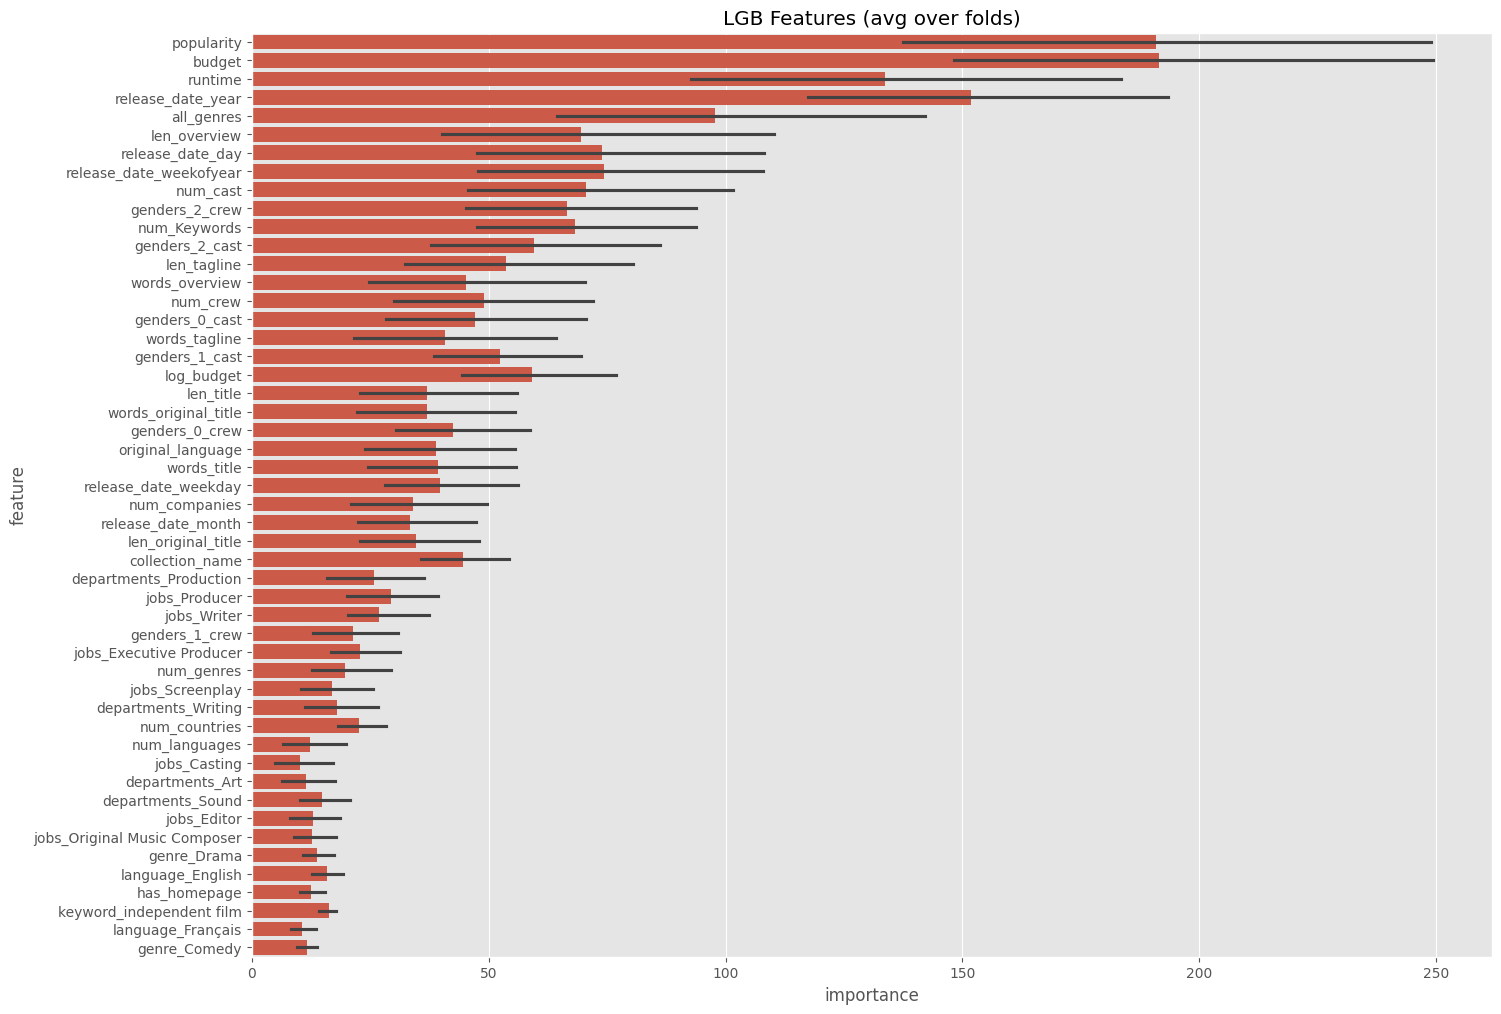

In [452]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 10,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb, prediction_lgb, _ = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=True)

In [453]:
for col in train_texts.columns:
    vectorizer = TfidfVectorizer(
                sublinear_tf=True,
                analyzer='word',
                token_pattern=r'\w{1,}',
                ngram_range=(1, 2),
                min_df=10
    )
    vectorizer.fit(list(train_texts[col].fillna('')) + list(test_texts[col].fillna('')))
    train_col_text = vectorizer.transform(train_texts[col].fillna(''))
    test_col_text = vectorizer.transform(test_texts[col].fillna(''))
    #创建一个带交叉验证的岭回归模型对象。
    #alphas=(0.01, 0.1, 1.0, 10.0, 100.0)：指定要尝试的正则化参数  的取值范围。
    #scoring='neg_mean_squared_error'：指定评估指标为负均方误差
    #cv=folds：指定交叉验证的折数和划分方式，folds 应该是一个 KFold 或其他交叉验证对象。
    model = linear_model.RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0), scoring='neg_mean_squared_error', cv=folds)
    oof_text, prediction_text = train_model(train_col_text, test_col_text, y, params=None, model_type='sklearn', model=model)
    
    X[col + '_oof'] = oof_text
    X_test[col + '_oof'] = prediction_text

Fold 0 started at Fri Feb 28 17:29:48 2025
Fold 1 started at Fri Feb 28 17:29:49 2025
Fold 2 started at Fri Feb 28 17:29:49 2025
Fold 3 started at Fri Feb 28 17:29:49 2025
Fold 4 started at Fri Feb 28 17:29:49 2025
Fold 5 started at Fri Feb 28 17:29:49 2025
Fold 6 started at Fri Feb 28 17:29:50 2025
Fold 7 started at Fri Feb 28 17:29:50 2025
Fold 8 started at Fri Feb 28 17:29:50 2025
Fold 9 started at Fri Feb 28 17:29:50 2025
CV mean score: 2.9692, std: 0.2116.


C:\Users\PC\AppData\Local\Temp\ipykernel_16464\427438189.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\427438189.py:20: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Fold 0 started at Fri Feb 28 17:29:51 2025
Fold 1 started at Fri Feb 28 17:29:51 2025
Fold 2 started at Fri Feb 28 17:29:51 2025
Fold 3 started at Fri Feb 28 17:29:52 2025
Fold 4 started at Fri Feb 28 17:29:52 2025
Fold 5 started at Fri Feb 28 17:29:52 2025
Fold 6 started at Fri Feb 28 17:29:52 2025
Fold 7 started at Fri Feb 28 17:29:53 2025
Fold 8 started at Fri Feb 28 17:29:53 2025
Fold 9 started at Fri Feb 28 17:29:53 2025
CV mean score: 2.8814, std: 0.1759.


C:\Users\PC\AppData\Local\Temp\ipykernel_16464\427438189.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\427438189.py:20: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Fold 0 started at Fri Feb 28 17:29:55 2025
Fold 1 started at Fri Feb 28 17:29:55 2025
Fold 2 started at Fri Feb 28 17:29:56 2025
Fold 3 started at Fri Feb 28 17:29:57 2025
Fold 4 started at Fri Feb 28 17:29:57 2025
Fold 5 started at Fri Feb 28 17:29:58 2025
Fold 6 started at Fri Feb 28 17:29:59 2025
Fold 7 started at Fri Feb 28 17:29:59 2025
Fold 8 started at Fri Feb 28 17:30:00 2025
Fold 9 started at Fri Feb 28 17:30:00 2025
CV mean score: 2.9270, std: 0.1988.
Fold 0 started at Fri Feb 28 17:30:01 2025


C:\Users\PC\AppData\Local\Temp\ipykernel_16464\427438189.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\427438189.py:20: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



Fold 1 started at Fri Feb 28 17:30:01 2025
Fold 2 started at Fri Feb 28 17:30:02 2025
Fold 3 started at Fri Feb 28 17:30:02 2025
Fold 4 started at Fri Feb 28 17:30:02 2025
Fold 5 started at Fri Feb 28 17:30:02 2025
Fold 6 started at Fri Feb 28 17:30:02 2025
Fold 7 started at Fri Feb 28 17:30:02 2025
Fold 8 started at Fri Feb 28 17:30:03 2025
Fold 9 started at Fri Feb 28 17:30:03 2025
CV mean score: 2.9577, std: 0.2069.


C:\Users\PC\AppData\Local\Temp\ipykernel_16464\427438189.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\427438189.py:20: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [454]:
X.head()

budget  original_language  popularity  runtime  collection_name  \
0  14000000                 10    6.575393     93.0              282   
1  40000000                 10    8.248895    113.0              641   
2   3300000                 10   64.299990    105.0                1   
3   1200000                 16    3.174936    122.0                1   
4         0                 24    1.148070    118.0                1   

   has_collection  num_genres  all_genres  genre_Drama  genre_Comedy  \
0               1           1         480            0             1   
1               1           4         516            1             1   
2               0           1         658            1             0   
3               0           2         742            1             0   
4               0           2         295            0             0   

   genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  \
0               0             0              0            0                0   
1               0             0              1            0                0   
2               0             0              0            0                0   
3               1             0              0            0                0   
4               1             1              0            0                0   

   genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  \
0             0                      0             0              0   
1             0                      0             1              0   
2             0                      0             0              0   
3             0                      0             0              0   
4             0                      0             0              0   

   genre_Mystery  genre_Animation  genre_History  genre_Music  num_companies  \
0              0                0              0            0              3   
1              0                0              0            0              1   
2              0                0              0            0              3   
3              0                0              0            0              0   
4              0                0              0            0              0   

   production_company_Warner Bros.  production_company_Universal Pictures  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   production_company_Paramount Pictures  \
0                                      1   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Twentieth Century Fox Film Corporation  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   production_company_Columbia Pictures  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   production_company_Metro-Goldwyn-Mayer (MGM)  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   production_company_New Line Cinema  production_company_Touchstone Pi

In [455]:
def new_features(df):
    df['budget_to_popularity'] = df['budget'] / df['popularity']
    df['budget_to_runtime'] = df['budget'] / df['runtime']
    
    # some features from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3
    df['_budget_year_ratio'] = df['budget'] / (df['release_date_year'] * df['release_date_year'])
    df['_releaseYear_popularity_ratio'] = df['release_date_year'] / df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity'] / df['release_date_year']
    
    df['runtime_to_mean_year'] = df['runtime'] / df.groupby("release_date_year")["runtime"].transform('mean')
    df['popularity_to_mean_year'] = df['popularity'] / df.groupby("release_date_year")["popularity"].transform('mean')
    df['budget_to_mean_year'] = df['budget'] / df.groupby("release_date_year")["budget"].transform('mean')
        
    return df

In [456]:
X = new_features(X)
X_test = new_features(X_test)

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\2718916666.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\2718916666.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\2718916666.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

Fold 0 started at Fri Feb 28 17:30:03 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1325]	training's rmse: 1.01365	valid_1's rmse: 1.80923
Fold 1 started at Fri Feb 28 17:30:05 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1480]	training's rmse: 0.980201	valid_1's rmse: 1.83848
Fold 2 started at Fri Feb 28 17:30:07 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[3073]	training's rmse: 0.599854	valid_1's rmse: 1.6842
Fold 3 started at Fri Feb 28 17:30:10 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1296]	training's rmse: 1.02399	valid_1's rmse: 1.84076
Fold 4 started at Fri Feb 28 17:30:11 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[3173]	training's rmse: 0.58284	valid_1's rmse: 1.70353
Fold 5 started at F

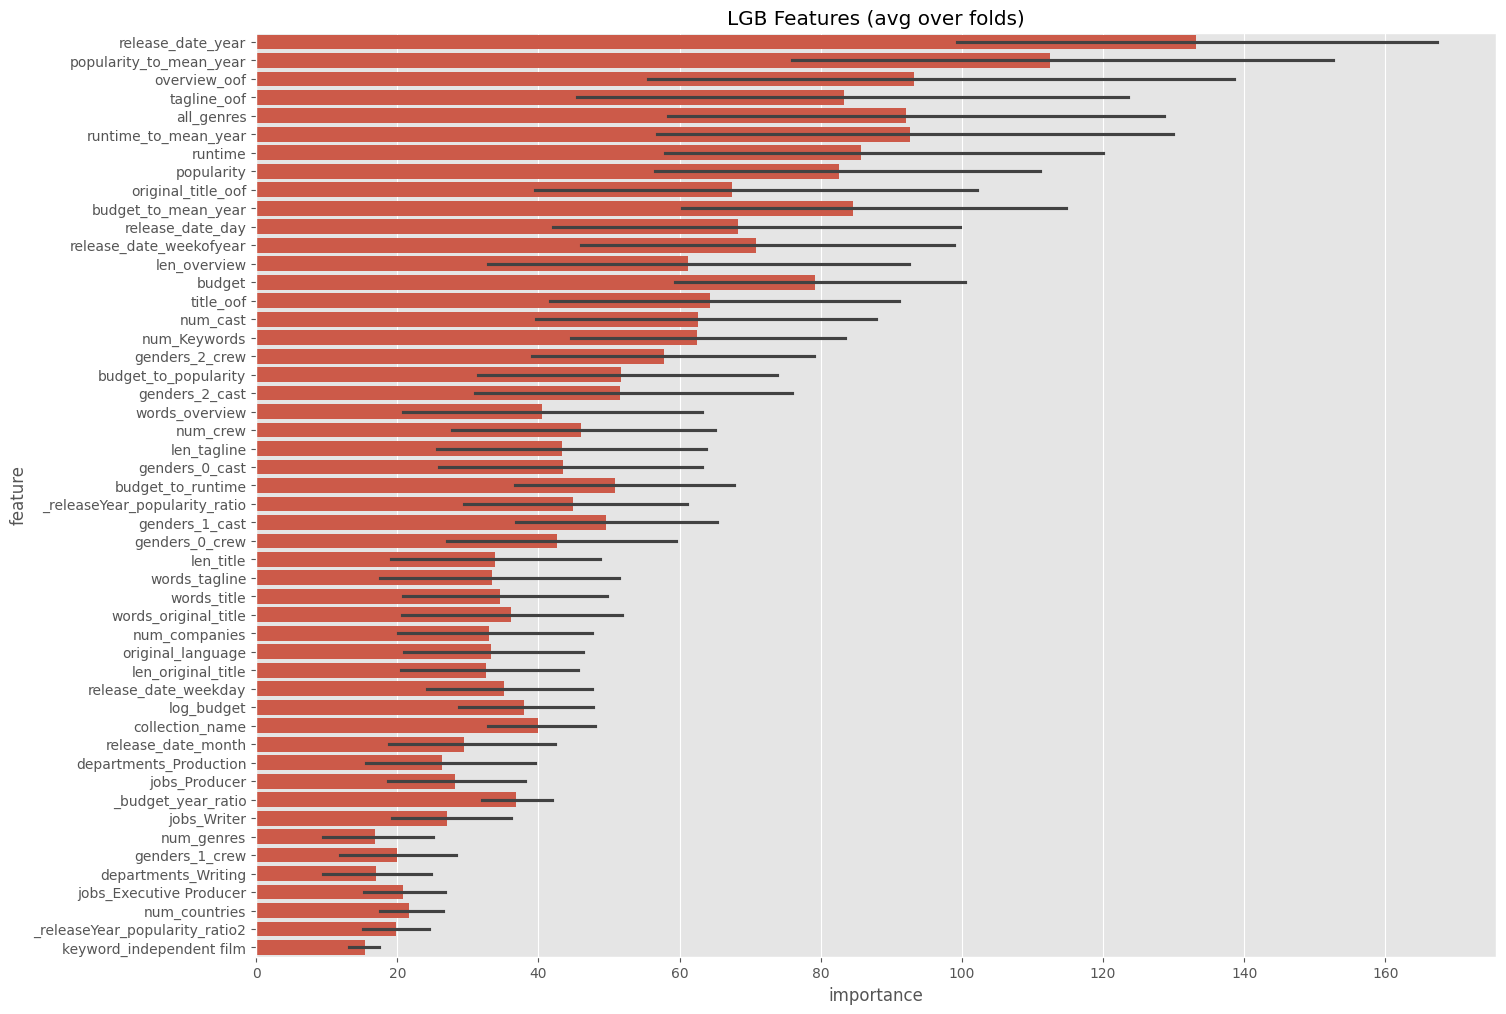

In [457]:
oof_lgb, prediction_lgb, _ = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=True)

In [458]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 6,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
model1 = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1,verbose=1000)
callbacks = [early_stopping(stopping_rounds=200)]
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse', callbacks=callbacks)

eli5.show_weights(model1, feature_filter=lambda x: x != '<BIAS>')

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1948]	training's rmse: 0.752653	valid_1's rmse: 2.06764


100%|===================| 2694/2700 [01:56<00:00]        

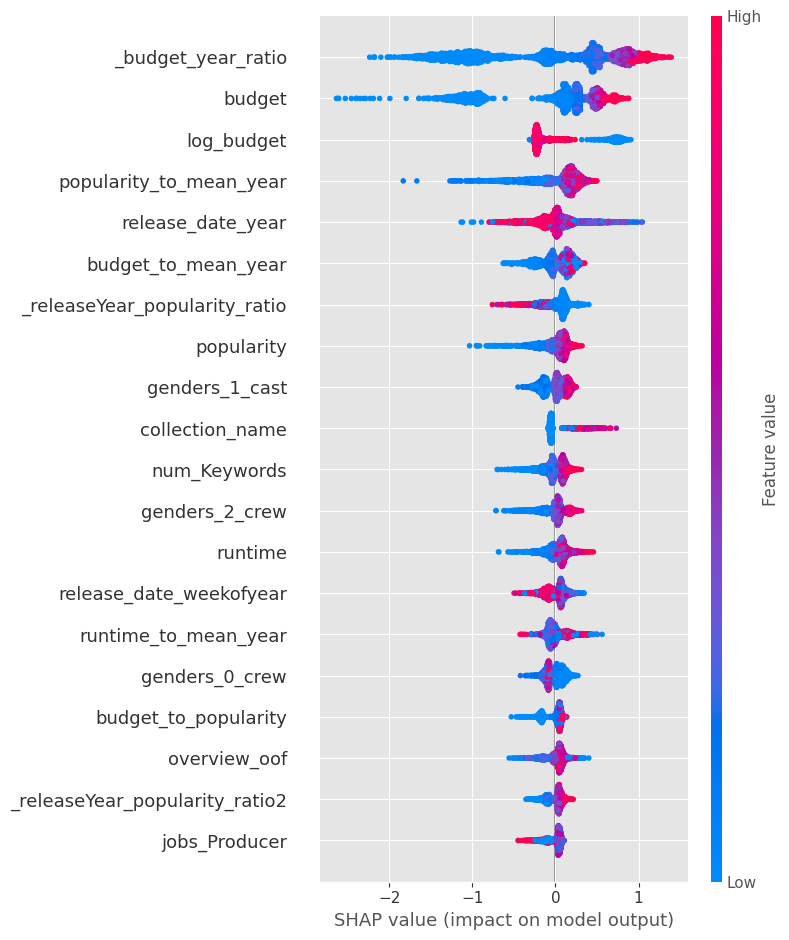

In [459]:
#shap.TreeExplainer：SHAP 库中专门为树模型（如决策树、随机森林、LightGBM、XGBoost 等）设计的解释器。
#它基于博弈论中的 Shapley 值来计算每个特征对模型预测结果的贡献。
explainer = shap.TreeExplainer(model1, X_train)
#调用 TreeExplainer 对象的 shap_values 方法，传入训练集的特征矩阵 X_train，计算每个样本中每个特征的 SHAP 值。
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



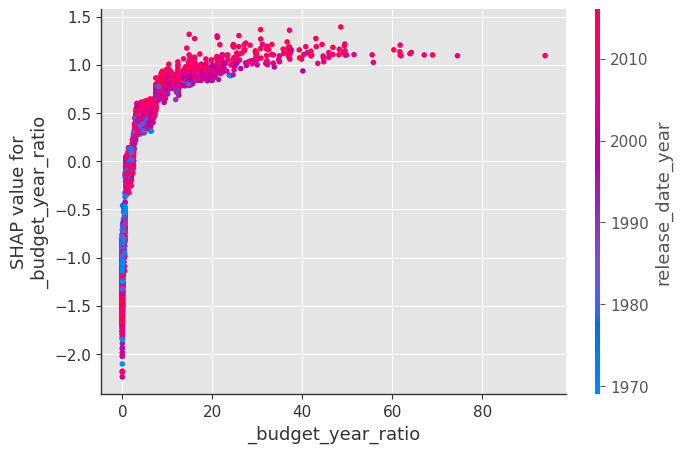

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



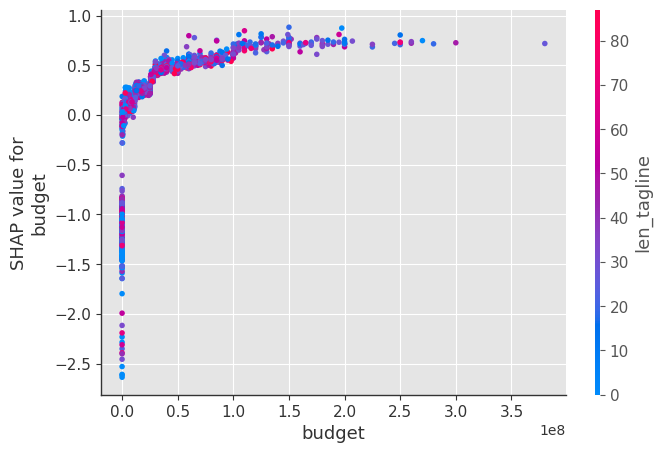

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



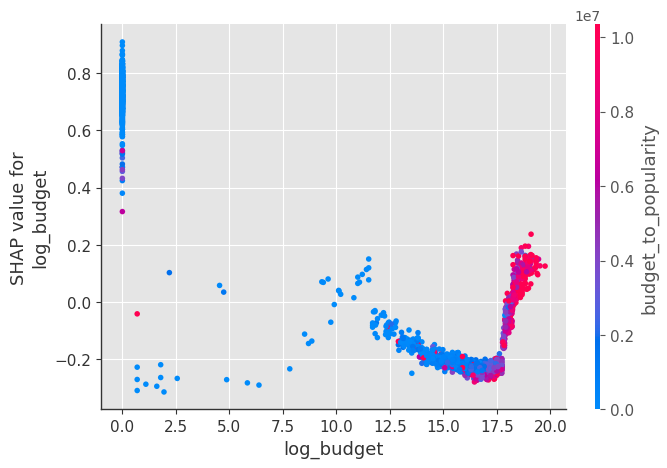

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



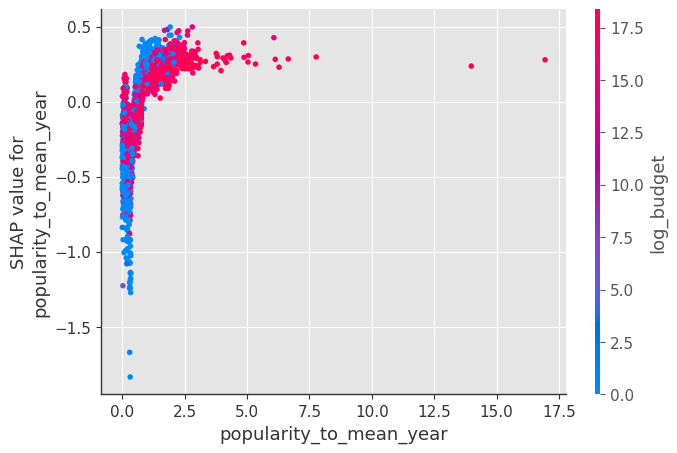

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



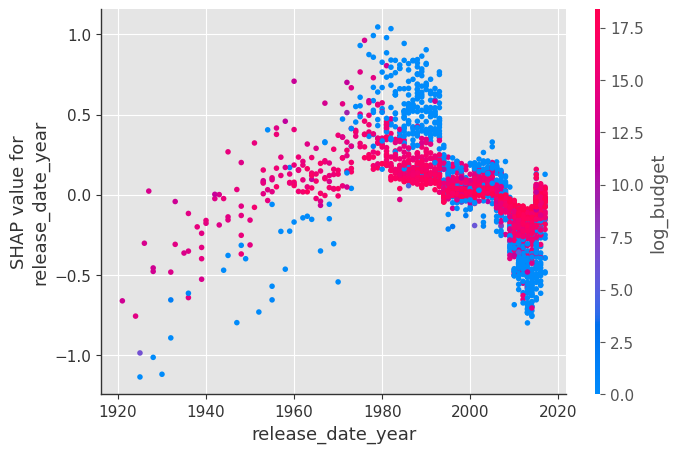

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



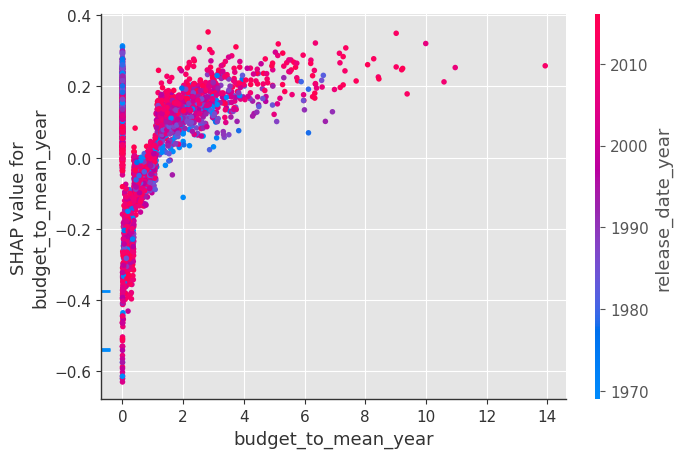

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



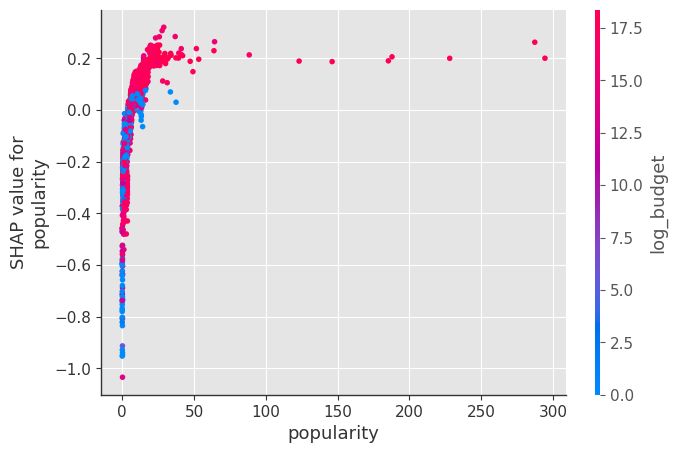

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



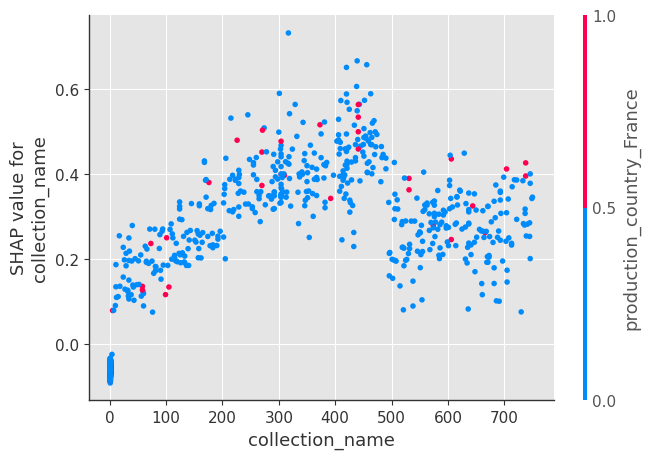

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



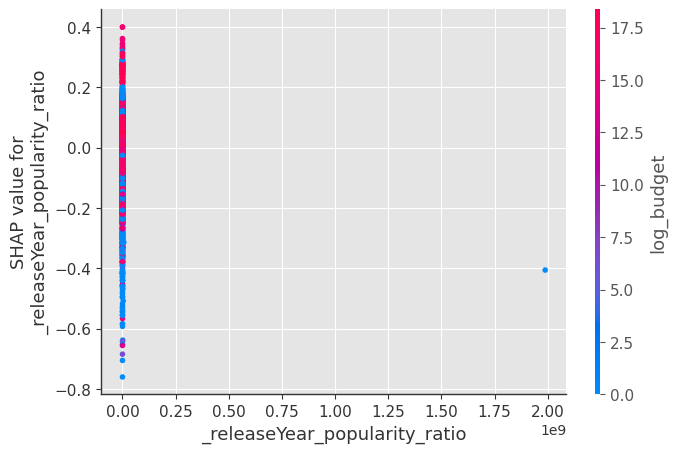

f:\anaconda\envs\pytorch\Lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

invalid value encountered in subtract



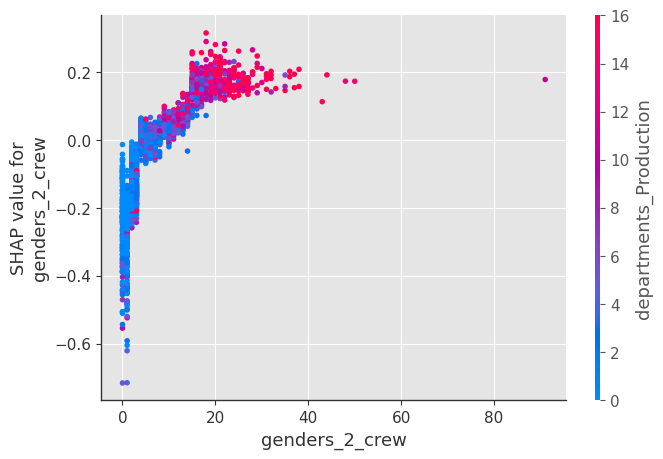

In [460]:
top_cols = X_train.columns[np.argsort(shap_values.std(0))[::-1]][:10]
for col in top_cols:
    shap.dependence_plot(col, shap_values, X_train)

In [461]:
def top_cols_interaction(df):
    df['budget_to_year'] = df['budget'] / df['release_date_year']
    df['budget_to_mean_year_to_year'] = df['budget_to_mean_year'] / df['release_date_year']
    df['popularity_to_mean_year_to_log_budget'] = df['popularity_to_mean_year'] / df['log_budget']
    df['year_to_log_budget'] = df['release_date_year'] / df['log_budget']
    df['budget_to_runtime_to_year'] = df['budget_to_runtime'] / df['release_date_year']
    df['genders_1_cast_to_log_budget'] = df['genders_1_cast'] / df['log_budget']
    df['all_genres_to_popularity_to_mean_year'] = df['all_genres'] / df['popularity_to_mean_year']
    df['genders_2_crew_to_budget_to_mean_year'] = df['genders_2_crew'] / df['budget_to_mean_year']
    df['overview_oof_to_genders_2_crew'] = df['overview_oof'] / df['genders_2_crew']
    
    return df

In [462]:
X = top_cols_interaction(X)
X_test = top_cols_interaction(X_test)

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\3032274342.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\3032274342.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\PC\AppData\Local\Temp\ipykernel_16464\3032274342.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [463]:
X = X.replace([np.inf, -np.inf], 0).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], 0).fillna(0)

In [464]:
trainAdditionalFeatures = pd.read_csv('../MoviesData/rawPredictData/TrainAdditionalFeatures.csv')
testAdditionalFeatures = pd.read_csv('../MoviesData/rawPredictData/TestAdditionalFeatures.csv')

train = pd.read_csv('../MoviesData/rawPredictData/train.csv')
test = pd.read_csv('../MoviesData/rawPredictData/test.csv')
X['imdb_id'] = train['imdb_id']
X_test['imdb_id'] = test['imdb_id']
del train, test

X = pd.merge(X, trainAdditionalFeatures, how='left', on=['imdb_id'])
X_test = pd.merge(X_test, testAdditionalFeatures, how='left', on=['imdb_id'])

X = X.drop(['imdb_id'], axis=1)
X_test = X_test.drop(['imdb_id'], axis=1)

In [465]:
X.head()

budget  original_language  popularity  runtime  collection_name  \
0  14000000                 10    6.575393     93.0              282   
1  40000000                 10    8.248895    113.0              641   
2   3300000                 10   64.299990    105.0                1   
3   1200000                 16    3.174936    122.0                1   
4         0                 24    1.148070    118.0                1   

   has_collection  num_genres  all_genres  genre_Drama  genre_Comedy  \
0               1           1         480            0             1   
1               1           4         516            1             1   
2               0           1         658            1             0   
3               0           2         742            1             0   
4               0           2         295            0             0   

   genre_Thriller  genre_Action  genre_Romance  genre_Crime  genre_Adventure  \
0               0             0              0            0                0   
1               0             0              1            0                0   
2               0             0              0            0                0   
3               1             0              0            0                0   
4               1             1              0            0                0   

   genre_Horror  genre_Science Fiction  genre_Family  genre_Fantasy  \
0             0                      0             0              0   
1             0                      0             1              0   
2             0                      0             0              0   
3             0                      0             0              0   
4             0                      0             0              0   

   genre_Mystery  genre_Animation  genre_History  genre_Music  num_companies  \
0              0                0              0            0              3   
1              0                0              0            0              1   
2              0                0              0            0              3   
3              0                0              0            0              0   
4              0                0              0            0              0   

   production_company_Warner Bros.  production_company_Universal Pictures  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   production_company_Paramount Pictures  \
0                                      1   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   production_company_Twentieth Century Fox Film Corporation  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   production_company_Columbia Pictures  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   production_company_Metro-Goldwyn-Mayer (MGM)  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   production_company_New Line Cinema  production_company_Touchstone Pi

Fold 0 started at Fri Feb 28 17:32:35 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[945]	training's rmse: 0.832326	valid_1's rmse: 1.7406
Fold 1 started at Fri Feb 28 17:32:37 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[644]	training's rmse: 1.02073	valid_1's rmse: 1.80327
Fold 2 started at Fri Feb 28 17:32:39 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1440]	training's rmse: 0.610652	valid_1's rmse: 1.63906
Fold 3 started at Fri Feb 28 17:32:42 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[521]	training's rmse: 1.11177	valid_1's rmse: 1.79354
Fold 4 started at Fri Feb 28 17:32:46 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1313]	training's rmse: 0.6556	valid_1's rmse: 1.62828
Fold 5 started at Fri F

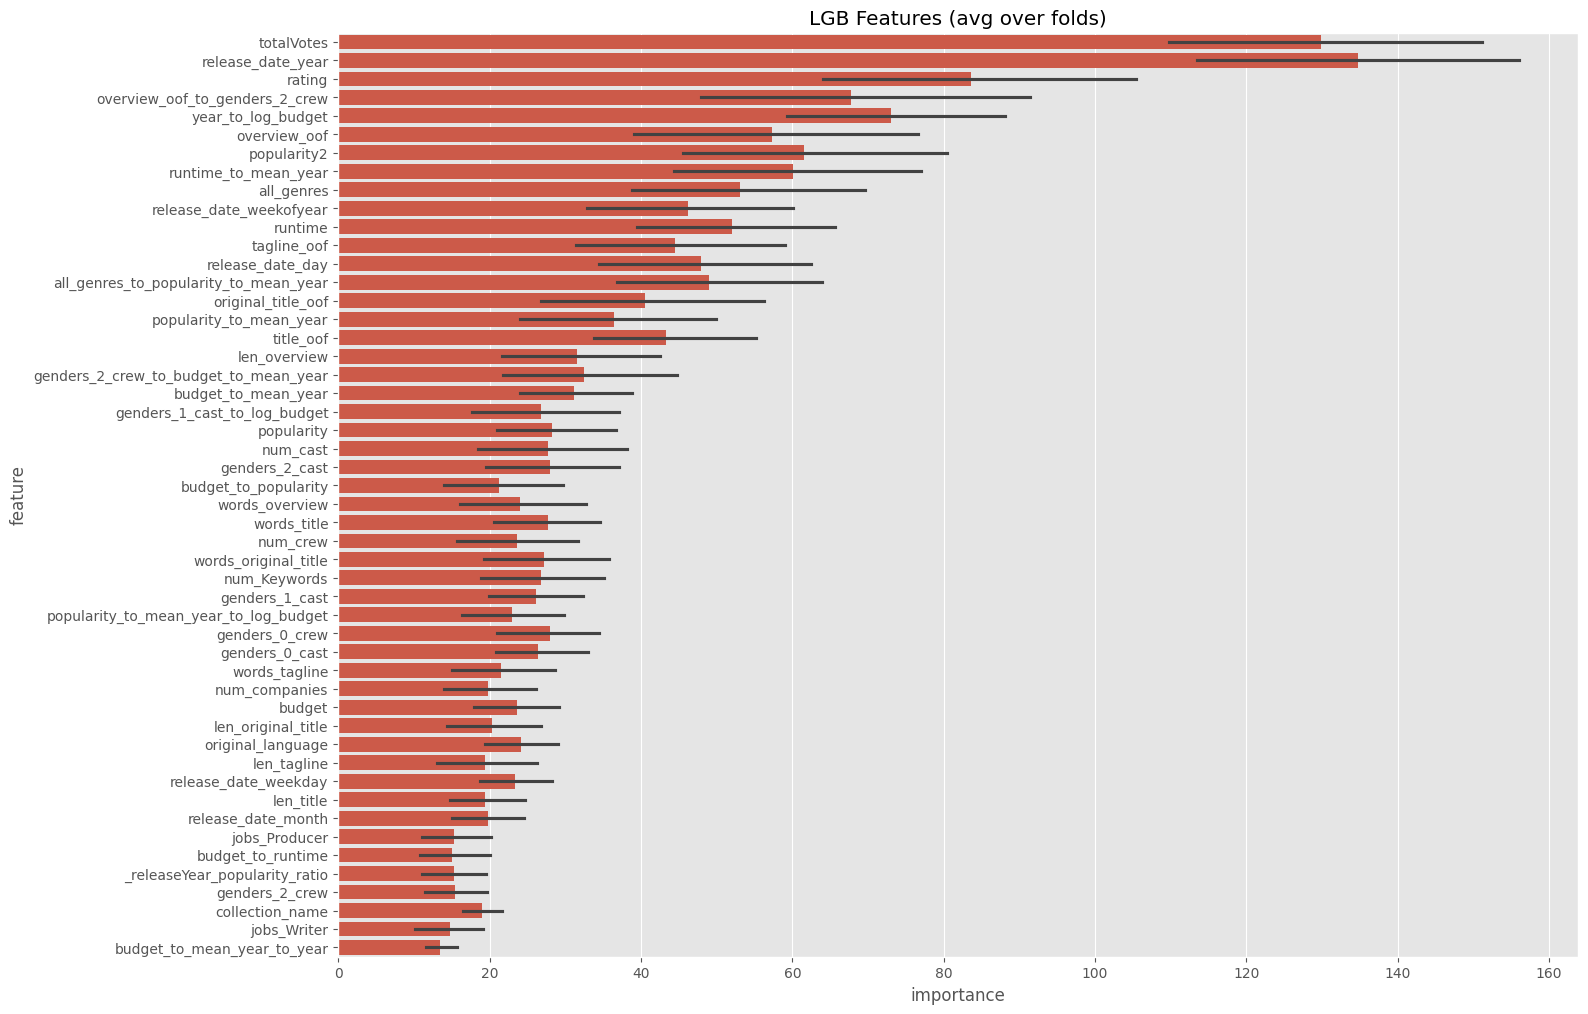

In [466]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 9,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb, prediction_lgb, _ = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=True)

In [467]:
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 7,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}
oof_xgb, prediction_xgb = train_model(X, X_test, y, params=xgb_params, model_type='xgb', plot_feature_importance=False)

Fold 0 started at Fri Feb 28 17:33:00 2025
[0]	train-rmse:2.97519	valid_data-rmse:2.93057


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[500]	train-rmse:0.81497	valid_data-rmse:1.72475
[1000]	train-rmse:0.48072	valid_data-rmse:1.70486
[1466]	train-rmse:0.30887	valid_data-rmse:1.70349
Fold 1 started at Fri Feb 28 17:33:08 2025
[0]	train-rmse:2.97759	valid_data-rmse:2.91551


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[500]	train-rmse:0.81079	valid_data-rmse:1.80568
[1000]	train-rmse:0.48568	valid_data-rmse:1.78982
[1145]	train-rmse:0.42212	valid_data-rmse:1.79391
Fold 2 started at Fri Feb 28 17:33:13 2025
[0]	train-rmse:2.99499	valid_data-rmse:2.73647


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[500]	train-rmse:0.83044	valid_data-rmse:1.59446
[1000]	train-rmse:0.48880	valid_data-rmse:1.57016
[1500]	train-rmse:0.30211	valid_data-rmse:1.56450
[1596]	train-rmse:0.27790	valid_data-rmse:1.56461
Fold 3 started at Fri Feb 28 17:33:21 2025
[0]	train-rmse:2.97574	valid_data-rmse:2.92252


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[500]	train-rmse:0.81931	valid_data-rmse:1.76721
[614]	train-rmse:0.72118	valid_data-rmse:1.76791
Fold 4 started at Fri Feb 28 17:33:24 2025
[0]	train-rmse:2.98342	valid_data-rmse:2.84470


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[500]	train-rmse:0.82206	valid_data-rmse:1.64487
[1000]	train-rmse:0.48964	valid_data-rmse:1.62184
[1500]	train-rmse:0.29945	valid_data-rmse:1.61359
[1582]	train-rmse:0.27714	valid_data-rmse:1.61436
Fold 5 started at Fri Feb 28 17:33:32 2025
[0]	train-rmse:2.98068	valid_data-rmse:2.87460


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[500]	train-rmse:0.83244	valid_data-rmse:1.64950
[1000]	train-rmse:0.50320	valid_data-rmse:1.63976
[1281]	train-rmse:0.38430	valid_data-rmse:1.64025
Fold 6 started at Fri Feb 28 17:33:38 2025
[0]	train-rmse:2.95451	valid_data-rmse:3.11341


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[500]	train-rmse:0.80194	valid_data-rmse:2.08396
[811]	train-rmse:0.57062	valid_data-rmse:2.08226
Fold 7 started at Fri Feb 28 17:33:42 2025
[0]	train-rmse:2.92120	valid_data-rmse:3.38791


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[500]	train-rmse:0.81840	valid_data-rmse:2.13023
[1000]	train-rmse:0.49466	valid_data-rmse:2.10272
[1500]	train-rmse:0.31233	valid_data-rmse:2.09181
[1809]	train-rmse:0.23473	valid_data-rmse:2.09073
Fold 8 started at Fri Feb 28 17:33:51 2025
[0]	train-rmse:2.94205	valid_data-rmse:3.21093


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[500]	train-rmse:0.82570	valid_data-rmse:2.00645
[949]	train-rmse:0.52346	valid_data-rmse:2.00524
Fold 9 started at Fri Feb 28 17:33:56 2025
[0]	train-rmse:2.99526	valid_data-rmse:2.73326


f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.

f:\anaconda\envs\pytorch\Lib\site-packages\xgboost\core.py:158: UserWarning:

[17:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.




[415]	train-rmse:0.88869	valid_data-rmse:1.82040
CV mean score: 1.8052, std: 0.1821.


In [468]:
cat_params = {'learning_rate': 0.002,
              'depth': 5,
              'l2_leaf_reg': 10,
              # 'bootstrap_type': 'Bernoulli',
              'colsample_bylevel': 0.8,
              'bagging_temperature': 0.2,
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 100,
              'random_seed': 11,
              'allow_writing_files': False}
oof_cat, prediction_cat = train_model(X, X_test, y, params=cat_params, model_type='cat')

Fold 0 started at Fri Feb 28 17:33:58 2025
Fold 1 started at Fri Feb 28 17:34:37 2025
Fold 2 started at Fri Feb 28 17:35:06 2025
Fold 3 started at Fri Feb 28 17:36:17 2025
Fold 4 started at Fri Feb 28 17:37:08 2025
Fold 5 started at Fri Feb 28 17:37:52 2025
Fold 6 started at Fri Feb 28 17:38:25 2025
Fold 7 started at Fri Feb 28 17:38:57 2025
Fold 8 started at Fri Feb 28 17:40:03 2025
Fold 9 started at Fri Feb 28 17:40:31 2025
CV mean score: 1.8210, std: 0.1779.


In [469]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb_1, prediction_lgb_1 = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=False)

Fold 0 started at Fri Feb 28 17:40:47 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[761]	training's rmse: 1.30565	valid_1's rmse: 1.74679
Fold 1 started at Fri Feb 28 17:40:48 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1253]	training's rmse: 1.11373	valid_1's rmse: 1.82583
Fold 2 started at Fri Feb 28 17:40:49 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[1895]	training's rmse: 0.920494	valid_1's rmse: 1.65447
Fold 3 started at Fri Feb 28 17:40:51 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[550]	training's rmse: 1.40731	valid_1's rmse: 1.79152
Fold 4 started at Fri Feb 28 17:40:52 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[2064]	training's rmse: 0.876754	valid_1's rmse: 1.62006
Fold 5 started at Fr

In [470]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 7,
         'learning_rate': 0.02,
         "boosting": "gbdt",
         "feature_fraction": 0.7,
         "bagging_freq": 5,
         "bagging_fraction": 0.7,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb_2, prediction_lgb_2 = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=False)

Fold 0 started at Fri Feb 28 17:41:00 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[538]	training's rmse: 0.942749	valid_1's rmse: 1.76265
Fold 1 started at Fri Feb 28 17:41:01 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[410]	training's rmse: 1.08646	valid_1's rmse: 1.83028
Fold 2 started at Fri Feb 28 17:41:02 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[451]	training's rmse: 1.03594	valid_1's rmse: 1.69421
Fold 3 started at Fri Feb 28 17:41:03 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[291]	training's rmse: 1.21299	valid_1's rmse: 1.79854
Fold 4 started at Fri Feb 28 17:41:04 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[464]	training's rmse: 1.00871	valid_1's rmse: 1.64933
Fold 5 started at Fri Fe

In [471]:
train_stack = np.vstack([oof_lgb, oof_xgb, oof_cat, oof_lgb_1, oof_lgb_2]).transpose()
train_stack = pd.DataFrame(train_stack, columns=['lgb', 'xgb', 'cat', 'lgb_1', 'lgb_2'])
test_stack = np.vstack([prediction_lgb, prediction_xgb, prediction_cat, prediction_lgb_1, prediction_lgb_2]).transpose()
test_stack = pd.DataFrame(test_stack, columns=['lgb', 'xgb', 'cat', 'lgb_1', 'lgb_2'])

Fold 0 started at Fri Feb 28 17:41:08 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[376]	training's rmse: 1.76564	valid_1's rmse: 1.70664
Fold 1 started at Fri Feb 28 17:41:09 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[282]	training's rmse: 1.76589	valid_1's rmse: 1.87953
Fold 2 started at Fri Feb 28 17:41:09 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[686]	training's rmse: 1.73687	valid_1's rmse: 1.60663
Fold 3 started at Fri Feb 28 17:41:09 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[807]	training's rmse: 1.71879	valid_1's rmse: 1.76382
Fold 4 started at Fri Feb 28 17:41:09 2025
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[233]	training's rmse: 1.80998	valid_1's rmse: 1.66784
Fold 5 started at Fri Feb

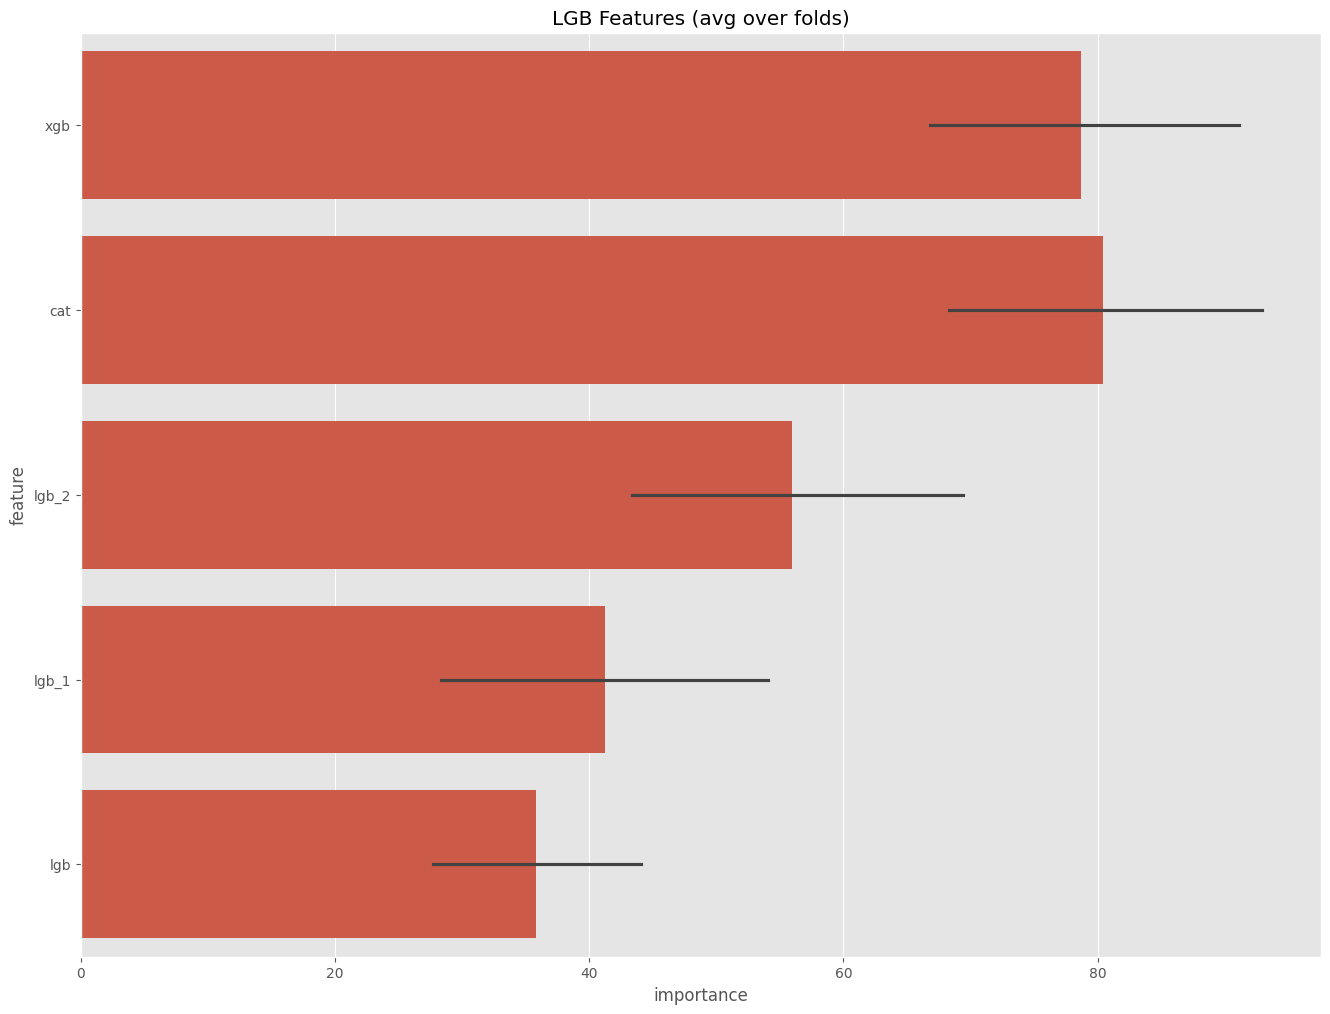

In [472]:
params = {'num_leaves': 8,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 3,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb_stack, prediction_lgb_stack, _ = train_model(train_stack, test_stack, y, params=params, model_type='lgb', plot_feature_importance=True)

In [473]:
model = linear_model.RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0), scoring='neg_mean_squared_error', cv=folds)
oof_rcv_stack, prediction_rcv_stack = train_model(train_stack.values, test_stack.values, y, params=None, model_type='sklearn', model=model)

Fold 0 started at Fri Feb 28 17:41:10 2025
Fold 1 started at Fri Feb 28 17:41:10 2025
Fold 2 started at Fri Feb 28 17:41:10 2025
Fold 3 started at Fri Feb 28 17:41:10 2025
Fold 4 started at Fri Feb 28 17:41:10 2025
Fold 5 started at Fri Feb 28 17:41:10 2025
Fold 6 started at Fri Feb 28 17:41:10 2025
Fold 7 started at Fri Feb 28 17:41:11 2025
Fold 8 started at Fri Feb 28 17:41:11 2025
Fold 9 started at Fri Feb 28 17:41:11 2025
CV mean score: 1.8001, std: 0.1773.


In [474]:
sub = pd.read_csv('../MoviesData/rawPredictData/sample_submission.csv')
sub['revenue'] = np.expm1(prediction_lgb)
sub.to_csv("lgb.csv", index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb) / 2)
sub.to_csv("blend.csv", index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb + prediction_cat) / 3)
sub.to_csv("blend1.csv", index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb + prediction_cat + prediction_lgb_1) / 4)
sub.to_csv("blend2.csv", index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb + prediction_cat + prediction_lgb_1 + prediction_lgb_2) / 5)
sub.to_csv("blend3.csv", index=False)

sub['revenue'] = prediction_lgb_stack
sub.to_csv("stack_lgb.csv", index=False)
sub['revenue'] = prediction_rcv_stack
sub.to_csv("stack_rcv.csv", index=False)